# Risk Analysis in Microcredit Portfolios - Banco W

### Table of Contents

#### **1. Business Understanding**
   - 1.1 Overview of the Challenge and Problem Statement ✅
   - 1.2 Objetive - SMART Question ✅
   - 1.3 Literature Review ✅

#### **2. Data Understanding**
   - 2.1 Data Dictionary ✅    
   - 2.2 Data Structure Analysis ✅
   - 2.3 Data cleaning ✅
   - 2.4 Univariate Analysis ✅
   - 2.5 Bivariate Analysis ✅

#### **3. Data Preparation**
   - 3.1 Dataset preprocessing ✅
   - 3.2 Feature Engineering ✅
      - 3.2.1 Data Preprocessing Pipeline  ✅

#### **4. Modeling**
   - 4.1 Logistic Regression - 0.8984  ⚠️
   - 4.2 XGBoost - 0.9225  ⚠️

#### **5. Evaluation & Deployment**
   - 5.1 Final Model Selection, Best Model Performance & Insights ⚠️
   - 5.2 Deployment Strategy  ✅

# **1. Business Understanding**

### 1.1. Overview of the Challenge and Problem Statement

<p align="justify"> This analysis is part of the **Data Analytics, Artificial Intelligence, and Machine Learning Challenge** by **Banco W**, which aims to develop a predictive model to identify and classify **high-risk clients and agencies** within the microcredit portfolio. To achieve this, **data science and AI techniques** will be applied to enhance decision-making in the **assignment of audit analysts**.
The microcredit auditing process requires assessing the risk associated with loans granted in the field, identifying unusual behavioral patterns, fraud, and high-risk profiles among clients and agencies. In the microfinance sector, effective risk management is crucial to ensuring the sustainability of lending institutions and minimizing losses due to loan defaults.

Definition of Microcredit
Microcredits are small-scale loans provided to low-income individuals or those with limited access to traditional banking, aiming to foster self-employment and small business development.

Characteristics of Microcredits
Lower loan amounts
Short repayment terms
Accessible interest rates
Risk assessment based on the borrower's repayment capacity and willingness rather than tangible collateral
In Colombia, a microcredit loan cannot exceed 120 times the current minimum legal wage (SMLV). This type of financing is primarily designed for micro-entrepreneurs and self-employed individuals.

</p>

### 1.2. Objective - SMART Question


<p align="center"><b>How can we develop a data-driven and AI-based model to identify high-risk loans, analysts, and agencies within Banco W's microcredit portfolio, leveraging credit characteristics, audit history, and financial stability factors to prioritize internal audits and enhance process efficiency within a six-month period?</b></p>

Why is it SMART?

- Specific: The question clearly defines the use of data analysis and artificial intelligence, focusing on high-risk loans, analysts, and agencies within the microcredit auditing context.

- Measurable: The objective is to identify high-risk cases and improve audit efficiency, which can be quantified through model performance metrics such as accuracy, precision, recall, or reduction in default rates.

- Achievable: The goal is feasible through exploratory data analysis (EDA), machine learning models, and available audit data from the bank's internal records.

- Relevant: The project is critical for enhancing financial risk management in microcredits and optimizing internal audit selection to mitigate potential losses.

- Time-bound: A six-month implementation timeframe is set, making it achievable within the scope of the project and course duration.

### 1.3. Literature Review


<p align="justify"> The analysis of **credit risk in loan portfolios** has been extensively studied in the context of **financial and banking audits**. Research highlights that **internal auditing** plays a crucial role in **credit risk management**, enabling financial institutions to mitigate losses and enhance decision-making processes (Berisha et al., 2023). These studies focus on the application of **quantitative methodologies**, such as **univariate analysis**, to identify risk patterns within loan portfolios.
On one hand, Moposita and Ramírez (2016) propose an audit framework for savings and credit cooperatives, emphasizing the importance of conducting detailed examinations of client behavior. This approach helps establish relationships between key variables such as loan amount, delinquency, and default probability.

On the other hand, Hernández Bautista (2023) introduces a financial analysis tool that segments clients based on their risk level. This study underscores that analyzing individual variables, such as loan amount, enhances the accuracy of predicting a client’s financial stability, facilitating audit processes and strategic decision-making.

These studies confirm that univariate analysis is a key technique in identifying and monitoring credit risk, particularly in microcredit audits. Its implementation allows financial institutions to recognize historical data patterns and improve the overall quality of their loan portfolios.

</p>


# **2. Data Understanding**

### 2.1. Data Dictionary - Microcredit Risk Analysis

| **Column Name**        | **Definition** |
|-----------------------|---------------|
| **ID_modif** | Unique identifier for each credit operation, anonymized for data protection. |
| **Credit_Type** | Type of credit granted (e.g., new, renewal, restructured). |
| **Disbursement_Date** | The date when the microcredit was disbursed to the client. |
| **Analyst_Visit** | Indicates whether the microcredit analyst visited the client for an evaluation. |
| **Auditor_Visit** | Indicates whether the auditor visited the client as part of the audit process. |
| **Business_Activity** | The type of economic activity the client engages in (e.g., retail, agriculture). |
| **Loan_Amount** | The total amount of the microcredit granted. |
| **Installment_Amount** | The periodic payment amount the client must pay. |
| **Loan_Term** | Duration of the loan in months. |
| **Portfolio_Rating** | Classification of the credit portfolio based on risk assessment. |
| **Employment_Status** | Indicates if the client has a stable job or business operation. |
| **Agency** | The microcredit agency responsible for issuing and managing the loan. |
| **Geographical_Zone** | The region where the client or agency is located. |
| **Risk_Category** | Classification of the credit’s risk level (e.g., high, medium, low). |
| **Findings** | Identified anomalies or observations in the credit auditing process. |
| **Finding_Type** | Classification of detected irregularities (e.g., fraud, policy breach). |
| **Audit_Classification** | Categorization of the credit based on audit evaluation results. |
| **Credit_Status** | The final state of the credit (e.g., normal, overdue, written-off). |
| **Year** | Year of the credit disbursement or audit analysis. |
| **Risk_Score** | A numerical indicator representing the estimated financial risk of a loan. |




### 2.2. Data Structure Analysis

<p align="justify"> Before selecting the variables, we first present the two main datasets:

1) Audit Findings History: Contains information on audits, evaluated clients, office and placement zones, credit types, credit status, and classifications of findings related to financial stability.

2) Credit Placement Data: Provides details on issued loans, client identifiers, loan amounts, interest rates, repayment terms, and installment values.

The audit history from 2022 to 2024 enables an analysis of trends in detected findings, while the credit placement dataset from October 2024 allows the identification of risks in the most recent loan portfolio.

However, the data presented the following challenges:

A significant number of missing values, which cannot be easily replaced due to their high volume.
A large number of categorical variables, which could be processed using techniques such as One-Hot Encoding or Label Encoding where appropriate.
Multiple ID variables that do not provide direct analytical value, although they could potentially be leveraged to infer client age patterns—older clients may have lower identification numbers, while younger clients might have higher ones.
</p>

### 2.3 Data cleaning 

#### Overall check

Reviewing the columns, we can gather valuable information about the data and the context, in order to know how to develop an EDA and ML project.  
We can also clean the columns data, in order to have valuable information.

--> First, we will do an overral check of the data. We will check the data type of each column, the number of missing values, the number of unique values, and some random data.
This review will give us some advices or guide of which columns to modify/clean.

--> Further check column per column, is done in the notebook `notebooks/data_cleaning.ipynb`

In [ ]:
pd.DataFrame({
    'objetc_type': df_base.dtypes.apply(lambda x: x.name).tolist(),
    'num_unique_values': df_base.nunique().tolist(),
    'num_nan_values': df_base.isna().sum().tolist(),
    'random_data': [df_base[col].sample(5).tolist() for col in df_base.columns]
}, index=df_base.columns)

,objetc_type,num_unique_values,num_nan_values,random_data
Num,int64,3919,0,"[1140, 3867, 3621, 2543, 2881]"
ID_modif,int64,3424,0,"[1151447243, 1098710400, 18417513, 79591442, 6..."
Cliente,object,3459,1,"[Wendys Johana Pacheco De La Rosa, Restrepo Mo..."
Analista,object,406,0,"[KVN, DTG, KAN, JKR, KBZ]"
Nombre analista,object,403,0,"[Rigoberto Figueroa Molina, Jorge Eduardo Her..."
Tipo crédito,object,5,202,"[Preferenci, Nuevo, Nuevo, Nuevo, Preferenci]"
Fecha desem,object,804,3,"[2024-03-30 00:00:00, 2023-06-05 00:00:00, 16/..."
Visita_analista_crédito,object,690,800,"[2022-07-21 00:00:00, 2023-07-05 00:00:00, 202..."
Visita_auditor,object,881,119,"[2023-12-12 00:00:00, 2024-01-18 00:00:00, 202..."
Actividad,object,2364,52,"[venta de leche, confecciones , chatarreria, e..."


#### Data cleaning steps

--> Next, **we will make a list of actions to pre-process and clean up the columns and observations**, in order to get more out of the following analysis and project phases.

--> In addition, **we will be leaving some comments on relevant information and knowledge of the data** from this cleaning and basic review stage.

In [ ]:
# 1. columns like "Num" & "ID_modif" are not relevant for the analysis. so, 
# We will eliminate it.

df = df_base.drop(columns=["Num", "ID_modif"])

In [ ]:
print(f'Number of clients with more than one record: {(df.Cliente.value_counts()>1).sum()}')

Number of clients with more than one record: 229


--> Each observation is a different audit analysis or **audit finding**, even for the same client/account.

**The clients-credit in the dataset should be unique, so we will eliminate the duplicated observations for the same Client-credit combination**. We take in consideration the possibility of a same client to have more than one credit in different moments.

In [ ]:
# 2. drop duplicates to have only one observation per client-credit
df = df.drop_duplicates(subset=["Cliente","Fecha desem", "Monto", "Cuota", "Plazo"]) 

# 3. rename Cliente column to avoid capital letters
df.rename(columns={"Cliente":"cliente"}, inplace=True)

In [ ]:
print(df.Analista.sample(5))
print()
print(df.Analista.apply(lambda x: len(x)).value_counts())

3148    MVQ
1156    EDN
1999    HBM
2485    KNX
1674    KTC
Name: Analista, dtype: object

Analista
3    3461
Name: count, dtype: int64


--> All the analyst codes have 3 letters.

In [ ]:
# 4. Drop the column Nombre analista. This column is not necessary for the analysis.
df = df.drop(columns=["Nombre analista"])

# 5. rename analista column to avoid capital letters
df = df.rename(columns={"Analista": "analista"})

-- > For the column "Tipo de credito" we found some typos, i.e. with the world "Preferencial" and "Renovacion". 
- **We will rename the column name to "tipo_credito"**
- **We will rename the "Preferenci" values as "Preferencial".**
- **We will rename the "Renovación" values as "Renovacion"**
- **We will rename the nan values with "No_especificado"**.


In [ ]:
# 6. rename 'tipo credito' column to avoid capital letters
df = df.rename(columns={"Tipo crédito": "tipo_credito"})

# 7. fill NaN values of tipo_credito column
df["tipo_credito"] = df["tipo_credito"].fillna("No_especificado")

# 8. Correct typos and unify levels
df["tipo_credito"] = np.where(df["tipo_credito"] == "Renovación", "Renovacion", df["tipo_credito"])
df["tipo_credito"] = np.where(df["tipo_credito"] == "Preferenci", "Preferencial", df["tipo_credito"])


---

In [ ]:
df[["Fecha desem","Visita_analista_crédito","Visita_auditor"]].sample(10, random_state=1)

,Fecha desem,Visita_analista_crédito,Visita_auditor
2431,2023-01-06 00:00:00,2023-01-02 00:00:00,2023-02-16 00:00:00
3342,2024-01-31 00:00:00,2024-01-30 00:00:00,2024-03-08 00:00:00
2107,2022-05-16 00:00:00,N/D,2023-08-16 00:00:00
1608,2022-06-13 00:00:00,2022-06-13 00:00:00,2023-01-13 00:00:00
3488,2024-03-27 00:00:00,NaN,2024-05-07 16:30:00
3905,2024-07-10 00:00:00,2024-07-05 00:00:00,2024-08-16 11:37:49.210000
968,31/03/2022,31/03/2022,00:00:00
2308,2023-07-22 00:00:00,2023-07-18 00:00:00,2023-07-28 08:50:00
1881,2023-03-30 00:00:00,2023-03-29 00:00:00,2023-05-09 00:00:00
3364,2024-02-29 00:00:00,2024-02-22 00:00:00,2024-03-13 00:00:00


--> Above we can see at least 6 different formats for the "dates" type columns. This is an unwanted problem.

For further analisys or feature engineering, we will keep the columns "Fecha desem" and "Visita_analista_credito". but in addition, we will do the next steps:

- **We will rename the columns to avoid capital letters and blank spaces.**
- **We will standarize the columns to a date format, avoiding errors and missing values**.
- **We will drop the observations with dates like "00:00:00".**
- **We will eliminate the auditor visit column**, because in an hipotetic modelling phase, we cant know the auditor visit in advance.

In [ ]:
# 9. rename dates columns
df = df.rename(columns={"Visita_analista_crédito": "visita_analista_credito","Fecha desem": "fecha_desembolso"})

# 10. drop observations with auditor visit dates similar to 00:00:00
df = df[(df["Visita_auditor"]!="00:00:00") & (df["Visita_auditor"]!=datetime.time(0, 0))]

# Define a function to handle different dates formats
def convert_to_datetime(value):
    if pd.isna(value) or value in ["N/D", "NAN"]:  # Handle missing or invalid values
        return pd.NaT
    try:
        return pd.to_datetime(value, dayfirst=True, errors='coerce')  # Convert to datetime and handle errors
    except:
        return pd.NaT  # Return NaT if it fails

# 11. Apply function to handle different dates formats to both columns
df["fecha_desembolso"] = df["fecha_desembolso"].apply(convert_to_datetime)
df["visita_analista_credito"] = df["visita_analista_credito"].apply(convert_to_datetime)

# 12. Drop column auditor visit
df = df.drop(columns=["Visita_auditor"])

---

Now, about the "Actividad" column:

--> We can see a lot of different activities, but also we can see that there are some values that are referring to the same, for example "Tienda" and "tienda".

--> Several activities have typos and errors. This could difficult the analysis or next phases.

The activity variable could be very important for any EDA or modelling, but it has a lot of values, errors and should be very difficult to fix.  
Despite that, we will try to fix the Activity column in order to gather some information in next steps:  

- **We will rename the variable column.**
- **We will run some fixes and considerations to the Activity column**.
- **and we will create a new activity_v2 column to not drop the original one.**

In [ ]:
# Function to clean Activity values
def clean_occupation(value):
    if pd.isna(value):  # Handle missing values
        return "no_especificado"
    value = value.strip()  # Remove spaces at the beginning and end
    value = unidecode(value)  # Remove accents
    value = value.lower()  # Convert to lowercase
    value = value.replace(" ", "_")  # Replace spaces with underscores
    return value

# 13. Clean activity values
df["Actividad"] = df["Actividad"].apply(clean_occupation)

# 14. rename column Actividad to avoid capital letters
df = df.rename(columns={"Actividad": "actividad"})

In [ ]:
### 15. Function to combine some Activity values to create macro-activities

def combine_occupation(value):
    if any(char in value for char in ["no_especificado"]):
        return "no_especificado"
    if any(char in value for char in ["ambulant"]):
        return "comercio_ambulante"
    elif any(
        char in value
        for char in [
            "agrico",
            "agricultura",
            "agro",
            "agricultor",
            "culti",
            "ganad",
            "cerdo",
            "pollo",
            "vaca",
            "animal",
            "cr?",
            "cria",
            "platano",
            "banano",
        ]
    ):
        return "agricultura_ganaderia_y_afines"
    elif any(
        char in value
        for char in [
            "comida",
            "restau",
            "alimen",
            "condimento",
            "cafe",
            "caf?",
            "frit",
            "plato",
            "frut",
            "fruv",
            "pan",
            "helad",
            "arepa",
            "empana",
            "piz",
            "leche",
            "almuerz",
            "carnic",
            "salsa",
            "lacte",
        ]
    ):
        return "sector_alimenticio"
    elif any(char in value for char in ["arriendo", "arren", "inmobi", "alquil"]):
        return "arriendos_alquiler_e_inmobiliarios"
    elif any(char in value for char in ["obra", "const", "interior","acabado"]):
        return "construccion_obras_y_afines"
    elif any(
        char in value for char in ["confec", "modist", "sastr", "costur", "prenda"]
    ):
        return "confeccion_y_afines"
    elif any(char in value for char in ["miscel","papel","boutique","floriste","flores","detall","sorpre","perfum","artesani","variedades"]):
        return "comercios_varios_y_detallistas"
    elif any(
        char in value for char in ["venta", "vta", "comercio", "mercanc", "comerci"]
    ):
        return "comercio_y_ventas_general"
    elif any(char in value for char in ["tienda", "almac", "supermer", "abarro","mercado_","ferret"]):
        return "tiendas_almacenes_y_ferreterias"
    elif any(
        char in value
        for char in [
            "mecan",
            "autom",
            "metal",
            "tecnico",
            "t?cni",
            "fabricac",
            "electri",
            "soldad",
            "pint",
            "laton",
            "taller",
            "manteni",
            "reparaci",
            "arregl",
            "ebanist",
            "herr",
            "plome",
            "artesan",
            "mueble",
            "manualida",
            "fundici",
            "guada",
            "llant",
            "vulcaniz",
        ]
    ):
        return "oficios_tecnicos_y_manuales"
    elif any(
        char in value for char in ["parquead", "parki", "lavade", "carwash"]
    ):
        return "lavaderos_parqueaderos_y_afines"
    elif any(
        char in value for char in ["transp", "trasp", "taxi", "bus", "vehicu", "moto","carga"]
    ):
        return "transporte_vehiculos_y_afines"
    elif any(
        char in value
        for char in [
            "manicur",
            "peluq",
            "bell",
            "unas",
            "u?as",
            "nail",
            "spa",
            "pein",
            "estili",
            "maquill",
            "barber",
            "masaj",
            "depil",
            "esteti",
            "cosmet",
        ]
    ):
        return "belleza_y_estetica"
    elif any(
        char in value for char in ["enferm", "medic", "salud", "drog", "farm", "hospi","dental","odonto"]
    ):
        return "salud_y_afines"
    elif any(
        char in value
        for char in ["educ", "escol", "refuer", "univ", "coleg", "clase", "docen"]
    ):
        return "servicios_educativos"
    elif any(char in value for char in ["aseo", "limpieza", "aseador"]):
        return "servicios_de_limpieza"
    else:
        return "otros_servicios_y_negocios"


df["actividad_v2"] = df["actividad"].apply(combine_occupation)

---

In [ ]:
print(df[(df["Cuota"]==0) | (df["Plazo"]==0) | (df["Monto"]==0)].shape)
print()
print(df[["Monto","Cuota","Plazo"]].iloc[0:3])

(12, 25)

       Monto    Cuota  Plazo
0  15069.268  792.642     36
1    402.000  209.228    626
3  19213.296  991.582     42


Following, about the columns Monto, Cuota & Plazo:

--> We note that the "Cuota" variable is an object, also there isnt nan values. We also note that there are some observations with zero.  
--> We note that the values of Monto & Cuota are divided by 1000

The cleaning steps will be:  

- We will modify the column names to avoid capital letters.
- **We will cast the Cuota column to float.** To do this, it is necessary to "clean" this column before cast it.
- **We will multiply the Monto & Cuota by 1000.**
- **We will drop the observations with a zero value in any of the three columns.**

In [ ]:
# 16. rename Monto, Cuota & Plazo columns
df = df.rename(columns={"Monto": "monto", "Cuota": "cuota", "Plazo": "plazo"})

# 17. eliminate characters that are not numbers in Cuota
df["cuota"] = df["cuota"].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# 18. turn empty strings into 0 in cuota column
df["cuota"] = np.where(df["cuota"] == "", "0", df["cuota"])

# 19. convert to float the column cuota
df["cuota"] = pd.to_numeric(df["cuota"], errors='coerce')

# 20. multiply by 1000 the cuota & monto columns to convert to thousands
df["cuota"] = round(df["cuota"] * 1000)
df["monto"] = round(df["monto"] * 1000)

# 21. drop the observations with a zero value in any of the three columns.
df = df[(df["cuota"] != 0) & (df["plazo"] != 0) & (df["monto"] != 0)]

---

In [ ]:
df[["Categoria","Hallazgo","Tipo hallazgo", "Riesgo"]].sample(5,random_state=2)

,Categoria,Hallazgo,Tipo hallazgo,Riesgo
898,ESTABILIDAD,Negocio en sociedad,Incumple P & P,2 - Medio
2137,Flujo_de_Caja,Otros ingresos inexistentes,Acto Irregular,2 - Medio
1158,OTRAS_POLITICAS,Formato de vinculación con campos en blanco y/...,Incumple P & P,2 - Medio
2495,Otras_Políticas,Formato de vinculación con campos en blanco y/...,Incumple\n P & P,2 - Medio
1009,FRAUDE_Y_PRÁCTICAS_INDEBIDAS,Alerta de Irregularidades,Acto Irregular,1 - Alto


--> We can see that each column have different strings formats, for example, capital letters, blank spaces, patterns like "\n", etc.  
We find some values that are referred to the same but are wroten different.

--> About the "Hallazgo" column, this is a description of the findings, it is like a comment column. Therefore, it is not necessary to modify it. We could even ignore this column.


In [ ]:
df[df["Riesgo"]=="No aplica"]["Categoria"].value_counts()

Categoria
LIMITACIÓN_EN_EL_ALCANCE    65
Sin_Hallazgo                53
Name: count, dtype: int64

In [ ]:
df[df["Categoria"]=="Sin_Hallazgo"]["Riesgo"].value_counts()

Riesgo
4 - Otro     939
No aplica     53
Name: count, dtype: int64

--> The "Riesgo" column is the cleanest one. It doesnt need cleaning steps.

Checking the "No aplica" level of the column "Riesgo", this level have values without findings or with limitations to complete the audit.

To clean this columns:

- We will drop the few NA values for each column
- **We will avoid capital letters and drop some patterns.**
- **We will rename some values of 'Categoria' & 'Tipo hallazgo' columns in order to unify levels.**
- We will rename the columns to avoid capital letters.
- **We will drop the observations with "Tipo hallazgo" equal to "Limitacion"**.
- Due to the previous step (#5), we will rename the level "No aplica" of the "Riesgo" column to "4 - otro"

In [ ]:
# 22. Drop nan values of the 4 columns (Categoria","Hallazgo","Tipo hallazgo", "Riesgo)
df = df.dropna(subset=["Categoria","Hallazgo","Tipo hallazgo", "Riesgo"])

# Function to clean the column values
def clean_string_column(value):
    if pd.isna(value):  # Handle missing values
        return "no_especificado"
    value = value.strip()  # Remove spaces at the beginning and end
    value = unidecode(value)  # Remove accents
    value = value.lower()  # Convert to lowercase
    return value

# 23. Apply function to clean the column values
df["Categoria"] = df["Categoria"].apply(clean_string_column)
df["Hallazgo"] = df["Hallazgo"].apply(clean_string_column)
df["Tipo hallazgo"] = df["Tipo hallazgo"].apply(clean_string_column)

# 24. Combine some finding types values due to typos (incumple p&p)
df["Tipo hallazgo"] = df["Tipo hallazgo"].apply(lambda x: "incumple_p&p" if "incumple" in x else x)

# 25. rename columns 
df = df.rename(
    columns={
        "Tipo hallazgo": "tipo_hallazgo",
        "Riesgo": "riesgo",
        "Categoria": "categoria",
        "Hallazgo": "hallazgo",
    }
)

# 26. drop observations with limitations (audit incomplete)
df=df[df["tipo_hallazgo"]!="limitacion"]

# 27- Rename values "No aplica" of column Riesgo
df["riesgo"] = df["riesgo"].str.replace("No aplica","4 - Otro")

---

--> The columns "Calificacion cartera" & "Relaciones laborales" have few typos and Nan values

To clean this columns: 

- Rename columns to avoid ccapital letters
- We will change NA values to "no_especificado"
- fix typos in Calificación cartera

In [ ]:
# 28. rename columns " Calificacion cartera" & "Relaciones laborales"
df.rename(columns={"Calificación cartera": "calificacion_cartera", "Relaciones Laborales": "relaciones_laborales"}, inplace=True)

# 29. Turn NaN values of both columns to "no_especificado"
df["calificacion_cartera"] = df["calificacion_cartera"].fillna("no_especificado")
df["relaciones_laborales"] = df["relaciones_laborales"].fillna("no_especificado")

# 30. fix typos
df["calificacion_cartera"] = df["calificacion_cartera"].apply(lambda x: "Si" if "si" in x else x)

---

In [ ]:
# 31. Rename column Oficina
df = df.rename(columns={"Oficina ": "oficina"})

# 32. avoid capital letters and blank spaces of column Oficina
df["oficina"] = df["oficina"].apply(lambda x: x.strip().lower().replace(" ","_"))

# 33. change column names for zona & regional
df = df.rename(columns={"zona ": "zona", "Regional": "regional"})



---

In [ ]:
temp = df["Validación unico"].value_counts()
print(f"\n'validacion unico' top: {temp}")


'validacion unico' top: Validación unico
ok          184
repetido     28
Name: count, dtype: int64


In [ ]:
# 34. drop observations with "repetido" value on column "validacion unico" and drop column
df = df[df["Validación unico"] != "repetido"]
df = df.drop(columns=["Validación unico"])

---

--> The column "Tipo analisis" have a lot of NA values and is no clear how this information could add value to our next steps. 

- We will drop this column due to the lack of valuable information

In [ ]:
# 35. drop column Tipo analisis
df = df.drop(columns=["Tipo analisis "])

--> The column "Clasificac analisis" have a lot of NA values and is no clear how this information could add value to our next steps. 

- We will drop this column due to the lack of valuable information

In [ ]:
# 36. drop column Tipo analisis
df = df.drop(columns=["Clasificac analisis"])

--> The column "Estado" seems to have valuable information about the credit status. Doesnt have typos but several NA values.

In order to clean this column:

- We will rename the column to avoid capital letters.
- We will fill NA values with "no_especificado".
- We will clean a little more the column to avoid capital letters nor blank spaces at the beginning or the last of the string.

In [ ]:
# 37. rename column Estado
df = df.rename(columns={"Estado": "estado"})

# 38. fill NaN values in column estado with no_especificado
df["estado"] = df["estado"].fillna("no_especificado")

# 39. From column estado, eliminate capital letters and blank spaces
df["estado"] = df["estado"].apply(lambda x: x.strip().lower())

In [ ]:
# 40. rename the column year
df = df.rename(columns={"Año": "year"})

# 41. drop the column tipo
df = df.drop(columns=["Tipo"])

#### Create new variables

**The variables that we will create below are intended to improve the exploratory analyses and provide more information about the understanding of the case.**

##### New Credit risk variables 

**objective variable**

In [ ]:
# 42. Create new column "riesgo", labeling the values to numbers (integers)

df["riesgo_int"] = df["riesgo"].replace({
    "1 - Alto": 1,
    "2 - Medio": 2,
    "3 - Bajo": 3,
    "4 - Otro": 4
})

# 43. Create new binomial "riesgo"
df["riesgo_bin"] = df["riesgo"].replace({
    "1 - Alto": 1,
    "2 - Medio": 1,
    "3 - Bajo": 1,
    "4 - Otro": 0
})

print(f'Label encoding "riesgo":\n{df["riesgo_int"].value_counts()}')
print("--")
print(f'Binomial encodign "riesgo":\n{df["riesgo_bin"].value_counts()}')

Label encoding "riesgo":
riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64
--
Binomial encodign "riesgo":
riesgo_bin
1    1832
0    1084
Name: count, dtype: int64


C:\Users\jhona\AppData\Local\Temp\ipykernel_30992\1207113423.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["riesgo_int"] = df["riesgo"].replace({
C:\Users\jhona\AppData\Local\Temp\ipykernel_30992\1207113423.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["riesgo_bin"] = df["riesgo"].replace({


##### New occupation variable

In [ ]:
# 44. combine some Activity values to create macro-activities

def combine_occupation(value):
    if any(char in value for char in ["no_especificado"]):
        return "no_especificado"
    if any(char in value for char in ["ambulant"]):
        return "comercio_ambulante"
    elif any(
        char in value
        for char in [
            "agrico",
            "agricultura",
            "agro",
            "agricultor",
            "culti",
            "ganad",
            "cerdo",
            "pollo",
            "vaca",
            "animal",
            "cr?",
            "cria",
            "platano",
            "banano",
        ]
    ):
        return "agricultura_ganaderia_y_afines"
    elif any(
        char in value
        for char in [
            "comida",
            "restau",
            "alimen",
            "condimento",
            "cafe",
            "caf?",
            "frit",
            "plato",
            "frut",
            "fruv",
            "pan",
            "helad",
            "arepa",
            "empana",
            "piz",
            "leche",
            "almuerz",
            "carnic",
            "salsa",
            "lacte",
        ]
    ):
        return "sector_alimenticio"
    elif any(char in value for char in ["arriendo", "arren", "inmobi", "alquil"]):
        return "arriendos_alquiler_e_inmobiliarios"
    elif any(char in value for char in ["obra", "const", "interior","acabado"]):
        return "construccion_obras_y_afines"
    elif any(
        char in value for char in ["confec", "modist", "sastr", "costur", "prenda"]
    ):
        return "confeccion_y_afines"
    elif any(char in value for char in ["miscel","papel","boutique","floriste","flores","detall","sorpre","perfum","artesani","variedades"]):
        return "comercios_varios_y_detallistas"
    elif any(
        char in value for char in ["venta", "vta", "comercio", "mercanc", "comerci"]
    ):
        return "comercio_y_ventas_general"
    elif any(char in value for char in ["tienda", "almac", "supermer", "abarro","mercado_","ferret"]):
        return "tiendas_almacenes_y_ferreterias"
    elif any(
        char in value
        for char in [
            "mecan",
            "autom",
            "metal",
            "tecnico",
            "t?cni",
            "fabricac",
            "electri",
            "soldad",
            "pint",
            "laton",
            "taller",
            "manteni",
            "reparaci",
            "arregl",
            "ebanist",
            "herr",
            "plome",
            "artesan",
            "mueble",
            "manualida",
            "fundici",
            "guada",
            "llant",
            "vulcaniz",
        ]
    ):
        return "oficios_tecnicos_y_manuales"
    elif any(
        char in value for char in ["parquead", "parki", "lavade", "carwash"]
    ):
        return "lavaderos_parqueaderos_y_afines"
    elif any(
        char in value for char in ["transp", "trasp", "taxi", "bus", "vehicu", "moto","carga"]
    ):
        return "transporte_vehiculos_y_afines"
    elif any(
        char in value
        for char in [
            "manicur",
            "peluq",
            "bell",
            "unas",
            "u?as",
            "nail",
            "spa",
            "pein",
            "estili",
            "maquill",
            "barber",
            "masaj",
            "depil",
            "esteti",
            "cosmet",
        ]
    ):
        return "belleza_y_estetica"
    elif any(
        char in value for char in ["enferm", "medic", "salud", "drog", "farm", "hospi","dental","odonto"]
    ):
        return "salud_y_afines"
    elif any(
        char in value
        for char in ["educ", "escol", "refuer", "univ", "coleg", "clase", "docen"]
    ):
        return "servicios_educativos"
    elif any(char in value for char in ["aseo", "limpieza", "aseador"]):
        return "servicios_de_limpieza"
    else:
        return "otros_servicios_y_negocios"


df["actividad_v2"] = df["actividad"].apply(combine_occupation)

# To check all the activities that have "venta" or "vta" or "comercio" or "mercancia" or "comerci" in the name
# pd.Series([x for x in df["actividad"] if any(char in x for char in ["venta", "vta", "comercio","mercancia","comerci"])]).unique()

In [ ]:
# 45. re order the columns of the df
df = df[["cliente", "analista", "tipo_credito", "actividad", "actividad_v2", "monto", "cuota", "plazo", "oficina", "zona", "regional", "fecha_desembolso", "visita_analista_credito",
         "calificacion_cartera", "relaciones_laborales", "estado", "year",
       "categoria", "hallazgo", "tipo_hallazgo", "riesgo","riesgo_int","riesgo_bin"]]

In [ ]:
df.sample(5)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,fecha_desembolso,visita_analista_credito,calificacion_cartera,relaciones_laborales,estado,year,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
389,Josefina Bedoya Mejia,MRC,Nuevo,tienda_josefina,tiendas_almacenes_y_ferreterias,1080000.0,121226.0,12,pereira_lagos,12,4,2022-06-29,2022-06-28,No,no_especificado,cancelada,2022,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0
2195,Ana Maria Morales Martinez,KSC,Renovacion,corredor_de_seguros,otros_servicios_y_negocios,6562050.0,680923.0,18,zipaquira,6,3,2022-12-28,2022-12-28,No,No,modificado,2023,calidad_de_datos,informacion errada en datos basicos,fallas en la metodologia,3 - Bajo,3,1
1981,Leidy Johana Vega Cortes,HBM,Nuevo,venta_por_catalogo,comercio_y_ventas_general,5625976.0,379736.0,24,chaparral,11,4,2023-06-07,2023-06-06,No,No,normal,2023,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0
1240,Javier Ramirez Zuniga,HZU,Nuevo,servicio_tecnico_gas_domiciliario,oficios_tecnicos_y_manuales,5634062.0,343157.0,33,laureano_gómez,2,1,2022-06-18,2022-06-16,No,no_especificado,cancelada,2022,otras_politicas,formato de vinculacion con campos en blanco y/...,incumple_p&p,2 - Medio,2,1
307,Martha Cecilia Garcia Medina,IOC,Renovacion,venta_de_pollo,agricultura_ganaderia_y_afines,5427250.0,339964.0,30,dosquebradas,12,4,2022-05-18,NaT,No,No,normal,2022,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0


### 2.4. Univariate Analysis

##### **Variable Selection: Mount**

<p align="justify"> Next, we will do some data explorations to the "Mount" variable, in order to gather valuable information that allow us to focus better the goal or solution.

To address the challenge from a **univariate analysis perspective**, several variables were considered as potential indicators of financial risk in microcredits, including:
Credit Type: Differentiates between new and renewal credits.
Credit Status: Classification based on its current state (canceled, charged-off, modified, etc.).
Outstanding Balance: Reflects the remaining debt, indicating financial exposure.
Loan Amount: The total credit granted.
Interest Rate: Represents the financial cost and risk profile of the borrower.
Loan Term: Short, medium, or long-term classification based on duration.
Office Location: Potential relationship between risk and agency distance from capital cities.
Audit Findings History: Records clients or agencies previously flagged as risky.
Client’s Economic Activity: Identifies industries with higher or lower default probability.
However, the selection of the variable "Loan Amount" (Monto) is justified based on the following key criteria:

1) Financial Exposure Indicator
Larger loans imply higher financial commitments, increasing the risk of default. Studies have shown that higher loan amounts tend to correlate with greater financial strain on borrowers, leading to increased default probabilities.

2) Key Credit Risk Factor
The loan amount is one of the most relevant variables in credit risk analysis, as it directly impacts default probability and portfolio stability (Berisha et al., 2023).

3) Anomaly and Fraud Detection
Outlier values in loan amounts can signal financial instability or potential irregularities, which may indicate fraudulent activities or mismanagement.

4) Empirical Support from Previous Research
-  Schreiner (2000): Identifies loan amount as a determinant factor in credit risk assessment.
-  Moposita & Ramírez (2016): Highlight loan amount as a key indicator in financial audits, enabling risk-based client segmentation. Univariate analysis techniques (e.g., histograms, boxplots) facilitate outlier detection and identification of default patterns.
-  Hernández Bautista (2023): Demonstrates that analyzing loan amounts alongside other financial metrics enhances risk segmentation. His findings show that the relationship between loan amount and payment behavior is a key factor in portfolio audits.

5) Suitability for Advanced Analyses
The Benford’s Law is applicable to naturally occurring numerical variables such as loan amounts, making it a useful tool for detecting data manipulations and inconsistencies.

6) Risk-Based Customer Segmentation
The distribution of loan amounts can reveal risk patterns, aiding in the identification of high-risk customers and optimizing internal audit processes.

</p>

In [ ]:
print(f'Number of observations: {df_clean.shape[0]}')
print(f'Number of NA values: {df_clean.monto.isna().sum()}')

Number of observations: 2916
Number of NA values: 0


##### Distribution

First, lets check the general distribution of the variable monto

In [ ]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: ${round(df_clean.monto.mean(),1):,}')
print(f'Median: ${round(df_clean.monto.quantile(0.5),1):,}')
print(f'Mode: ${round(df_clean.monto.mode()[0],1):,}')
print(f'Min: ${round(df_clean.monto.min(),1):,}')
print(f'Max: ${round(df_clean.monto.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: ${round(df_clean.monto.std(),1):,}')
print(f"Variation coefficient: {round(df_clean['monto'].std() / df_clean['monto'].mean() * 100,1)}")
print(f"Range: ${round(df_clean['monto'].max() - df_clean['monto'].min(),1):,} ")
print(f"IQR: ${round(df_clean['monto'].quantile(0.75) - df_clean['monto'].quantile(0.25),1):,} ")

print("\n--Measures of distribution shape:")
print(f"Skewness: {round(df_clean['monto'].skew(),1)}")
print(f"Kurtosis: {round(df_clean['monto'].kurtosis(),1)}")

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df_clean['monto'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: ${int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: $8,032,992.9
Median: $3,751,294.0
Mode: $400,000
Min: $400,000
Max: $115,832,618

--Measures of dispersion:
standard deviation: $12,178,405.0
Variation coefficient: 151.6
Range: $115,432,618 
IQR: $5,766,664.5 

--Measures of distribution shape:
Skewness: 3.5
Kurtosis: 16.2

--Some percentiles:
['P10: $1,088,578', 'P25: $1,833,451', 'P50: $3,751,294', 'P75: $7,600,116', 'P90: $20,077,732']


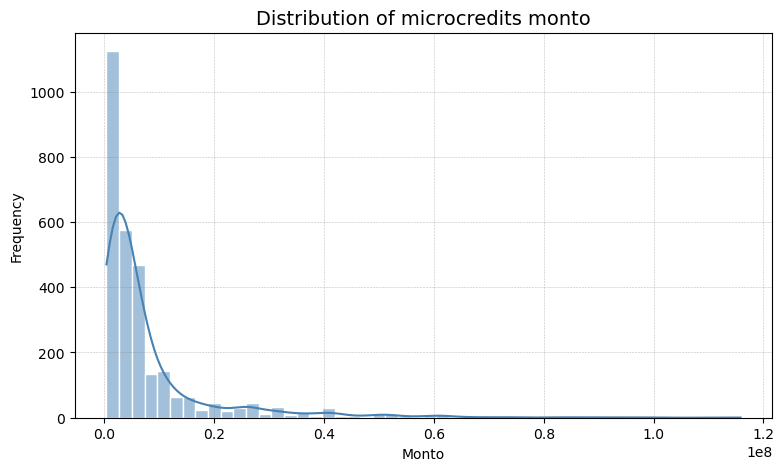

In [ ]:
# histogram
plt.figure(figsize=(9, 5))
sns.histplot(x=df_clean.monto, edgecolor="white", color="steelblue", linewidth=1, bins=50, kde=True)
plt.title('Distribution of microcredits monto', fontsize=14)
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

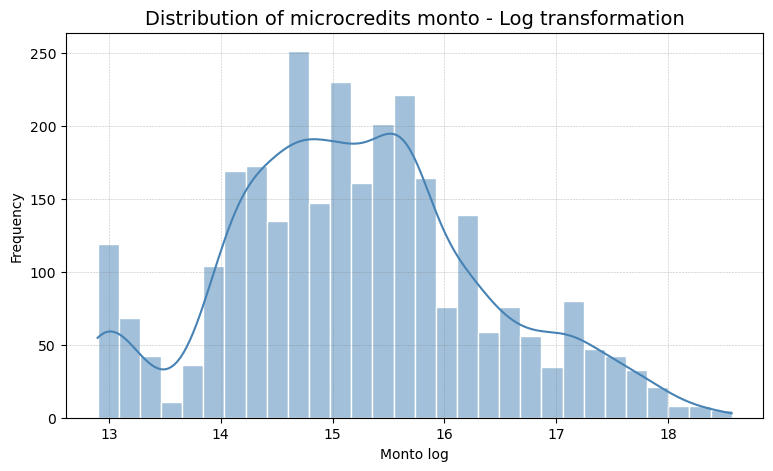

In [ ]:
# histogram with logarithmic transformation
plt.figure(figsize=(9, 5))
sns.histplot(x=np.log(df_clean.monto), edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title('Distribution of microcredits monto - Log transformation', fontsize=14)
plt.xlabel("Monto log")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

##### Check outliers

In [ ]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df_clean.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df_clean.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df_clean.monto[(df_clean.monto < lower_limit) | (df_clean.monto > upper_limit)]
upper_outliers = df_clean[(df_clean.monto > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of microcredits consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df_clean.shape[0]*100,2)}%')


Lets calculate some outliers metrics:

Outliers upper limit: $16,250,112.75
Outliers lower limit: $0
Number of microcredits consider as outliers: 355
% of outliers of the total observations: 12.17%


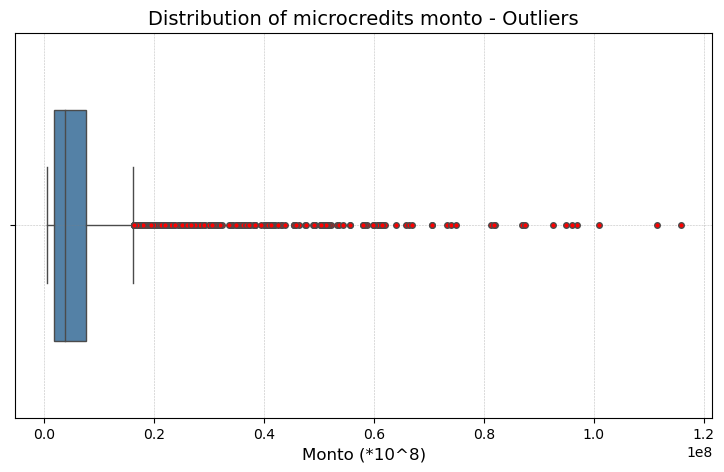

In [ ]:
# Boxplot

plt.figure(figsize=(9, 5))
sns.boxplot(x=df_clean['monto'], color="steelblue", linewidth=1, width=0.6, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto - Outliers", fontsize=14)
plt.xlabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

##### Other analysis and patterns

In [ ]:
print("The most frequently requested loans are:")
df_clean.monto.value_counts()[0:10]

The most frequently requested loans are:


400000     113
500000      68
1000000     32
600000      30
1500000     29
1631982     21
2345852     13
700000      11
800000      11
8000000      9
Name: monto, dtype: int64

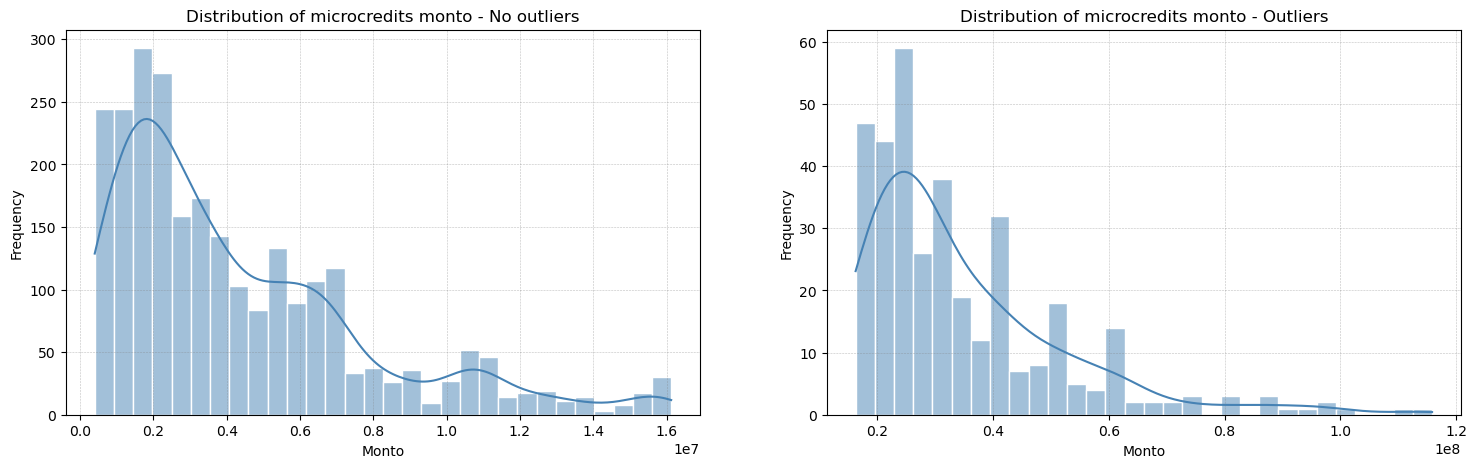

In [ ]:
# lets check the distribution of monto spliting the outliers observations

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x = df_clean[df_clean.monto<upper_limit].monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - No outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x = upper_outliers.monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - Outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()


## 2.5 Bivariate Analysis

**Objective**
- Identify patterns in each variables
- Evaluate whether certain analysts systematically approve riskier loans.
- Provide insights that may help optimize risk assessment and decision-making processes.

**Analysis Approach**
1. **Data Loading & Exploration**: Load and inspect the dataset to understand its structure.
2. **Descriptive Statistics**: Summarize key statistics for each variable level.
3. **Data Visualization**:
   - **Bar charts** to compare averages.
   - **Boxplots** to visualize distributions.
   - **Contingency tables & Chi-square test** to determine statistical relationships.
4. **Interpretation & Conclusions**: Identify key findings and actionable insights.


### **Analista vs Riesgo**



In [ ]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#Load data

df = pd.read_excel("G:\\Mi unidad\\Maestría Inteligencia Artificial Aplicada\\1. Primer semestre\\1. Análisis de datos I\\Reto Banco W\\Analitica_1\\Data\\output_data\\hallazgos_clean.xlsx")
df.head(20)



,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,...,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,...,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
2,2,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,dosquebradas,...,Si,modificado,2022,afecta estabilidad,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,1,1
3,3,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,oficios_tecnicos_y_manuales,1055378,205648,6,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
4,4,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,independencia,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
5,5,Alba Nory Ospina Quintero,EQJ,Preferencial,mercancia,comercio_y_ventas_general,30933408,1358673,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
6,6,Carmelita Arias De Diaz,IKO,Preferencial,venta_de_catalogos,comercio_y_ventas_general,2100000,167706,24,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
7,7,Liana Shirley Zapata Maya,CZL,Renovacion,clases_de_pintura_manualidades,oficios_tecnicos_y_manuales,400000,84084,8,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
8,8,Angela Patricia Pabon Castano,IKO,Renovacion,don_patacon,otros_servicios_y_negocios,31031562,1228002,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
9,9,Flor Alba Nunez Tagua,MAP,Renovacion,manualidades,oficios_tecnicos_y_manuales,3308000,431000,15,independencia,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


In [ ]:
# Revisión de los datos

# Verificar si hay valores nulos en las columnas de interés
print(df[['analista', 'riesgo_int']].isnull().sum())

# Contar cuántos analistas distintos hay en la base de datos
print(f"Número de analistas distintos: {df['analista'].nunique()}")

# Ver la distribución de los niveles de riesgo
print(df['riesgo_int'].value_counts())



analista      0
riesgo_int    0
dtype: int64
Número de analistas distintos: 386
riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64


¿Existen analistas que consistentemente aprueban más créditos de riesgo alto que los demás?

In [ ]:
# Crear una tabla de contingencia de analistas vs. niveles de riesgo
tabla_riesgo_por_analista = pd.crosstab(df['analista'], df['riesgo_int'])

# Mostrar la tabla generada
print(tabla_riesgo_por_analista)


riesgo_int  1  2  3   4
analista               
ACX         0  4  4   1
ADR         0  0  0   7
AIL         0  0  1  10
AIZ         2  0  0   1
AJI         0  1  0   1
...        .. .. ..  ..
SON         0  1  0  14
WBZ         0  4  0   0
YMG         2  1  1   7
YPN         2  2  0  16
ZUL         0  0  5   2

[386 rows x 4 columns]


In [ ]:
# Crear una nueva columna en la tabla con la suma de los otros niveles de riesgo (2, 3, 4)
tabla_riesgo_por_analista['Total_Otros_Riesgos'] = tabla_riesgo_por_analista[2] + tabla_riesgo_por_analista[3] + tabla_riesgo_por_analista[4]

# Filtrar los analistas que aprueban más créditos de riesgo alto (1) que los otros niveles combinados
analistas_riesgo_alto = tabla_riesgo_por_analista[tabla_riesgo_por_analista[1] > tabla_riesgo_por_analista['Total_Otros_Riesgos']]

# Mostrar los analistas que cumplen la condición
print("Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:")
print(analistas_riesgo_alto)


Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:
riesgo_int   1  2  3  4  Total_Otros_Riesgos
analista                                    
AIZ          2  0  0  1                    1
CJN          6  2  0  3                    5
EDN          2  0  0  0                    0
FFW          4  0  0  0                    0
FYJ          1  0  0  0                    0
IQB          2  1  0  0                    1
ISV          3  0  0  2                    2
ISY          3  0  0  1                    1
IZS          1  0  0  0                    0
JKR         13  0  0  7                    7
KLR          2  0  0  0                    0
KVN          8  1  0  2                    3
LQL          2  0  0  1                    1
LRG          3  0  0  2                    2
MFQ          6  0  0  1                    1


<Figure size 1200x600 with 0 Axes>

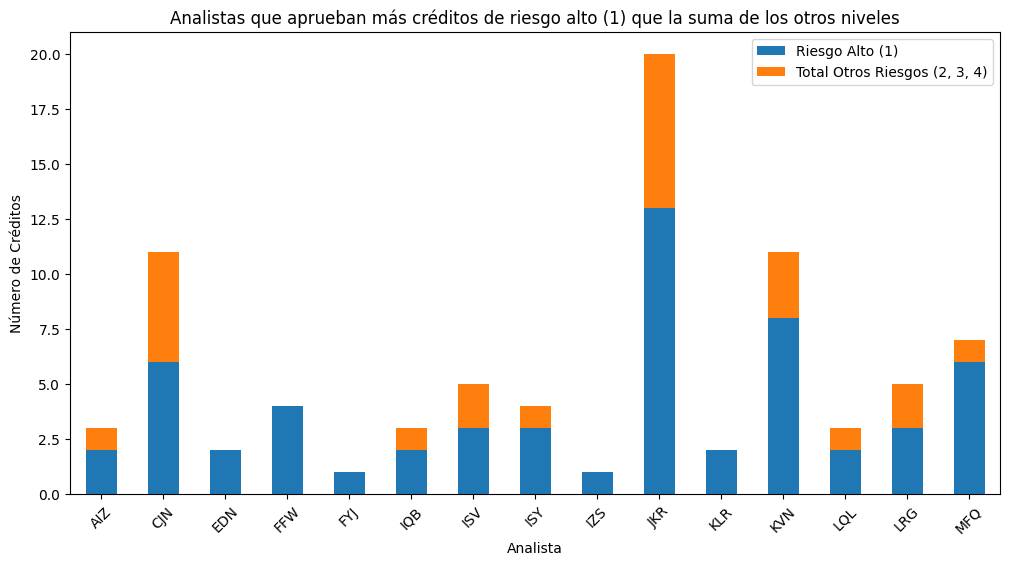

In [ ]:
# Gráfico de los analistas que aprueban más créditos de riesgo alto
plt.figure(figsize=(12,6))
analistas_riesgo_alto[[1, 'Total_Otros_Riesgos']].plot(kind='bar', figsize=(12,6), stacked=True)
plt.xlabel("Analista")
plt.ylabel("Número de Créditos")
plt.title("Analistas que aprueban más créditos de riesgo alto (1) que la suma de los otros niveles")
plt.legend(["Riesgo Alto (1)", "Total Otros Riesgos (2, 3, 4)"])
plt.xticks(rotation=45)
plt.show()


Al tener tantos analistas, agrupamos analistas con tasas de incumplimiento similares 

In [ ]:
# Clasificamos los estados de los créditos
 
# Definir la clasificación de estados
estado_clasificacion = {
    'cancelada': 'bueno',
    'normal': 'bueno',
    'castigo': 'malo',
    'cobro judicial': 'malo',
    'modificado': 'indeterminado',
    'reestructurado': 'indeterminado',
    'no_especificado': 'indeterminado'
}

# Crear una nueva columna con la clasificación
df['estado_categoria'] = df['estado'].map(estado_clasificacion)

# Verificar la distribución de la nueva clasificación
print(df['estado_categoria'].value_counts())


estado_categoria
bueno            2004
indeterminado     704
malo              208
Name: count, dtype: int64


In [ ]:
# Calculamos la tasa de incumplimiento por analista

# Contar el total de créditos aprobados por cada analista
total_creditos = df.groupby('analista').size()

# Contar cuántos créditos de cada analista fueron "malos" (castigo o cobro judicial)
creditos_malos = df[df['estado_categoria'] == 'malo'].groupby('analista').size()

# Calcular la tasa de incumplimiento (si el analista no tiene créditos malos, se pone 0)
tasa_incumplimiento = (creditos_malos / total_creditos).fillna(0)

# Convertir en DataFrame para visualizar mejor
df_tasa_incumplimiento = tasa_incumplimiento.reset_index()
df_tasa_incumplimiento.columns = ['analista', 'tasa_incumplimiento']

# Ver los analistas con mayor tasa de incumplimiento
df_tasa_incumplimiento.sort_values(by='tasa_incumplimiento', ascending=False).head(10)


,analista,tasa_incumplimiento
99,EUK,1.000000
145,GXI,1.000000
283,KDK,0.666667
44,CRA,0.500000
256,JSZ,0.500000
279,KBT,0.500000
268,JXQ,0.500000
270,JYL,0.500000
296,KLR,0.500000
90,EDN,0.500000


In [ ]:
# Agrupamos analistas en niveles de riesgo

# Definir umbrales para clasificar los analistas según su tasa de incumplimiento
def clasificar_analista(tasa):
    if tasa >= 0.3:  # Más del 30% de sus créditos son "malos"
        return 'Alto riesgo'
    elif tasa >= 0.1:  # Entre 10% y 30% de sus créditos son "malos"
        return 'Riesgo medio'
    else:  # Menos del 10% de sus créditos son "malos"
        return 'Bajo riesgo'

# Aplicar la clasificación
df_tasa_incumplimiento['categoria_riesgo'] = df_tasa_incumplimiento['tasa_incumplimiento'].apply(clasificar_analista)

# Ver distribución de los analistas en cada categoría
print(df_tasa_incumplimiento['categoria_riesgo'].value_counts())


categoria_riesgo
Bajo riesgo     311
Riesgo medio     51
Alto riesgo      24
Name: count, dtype: int64


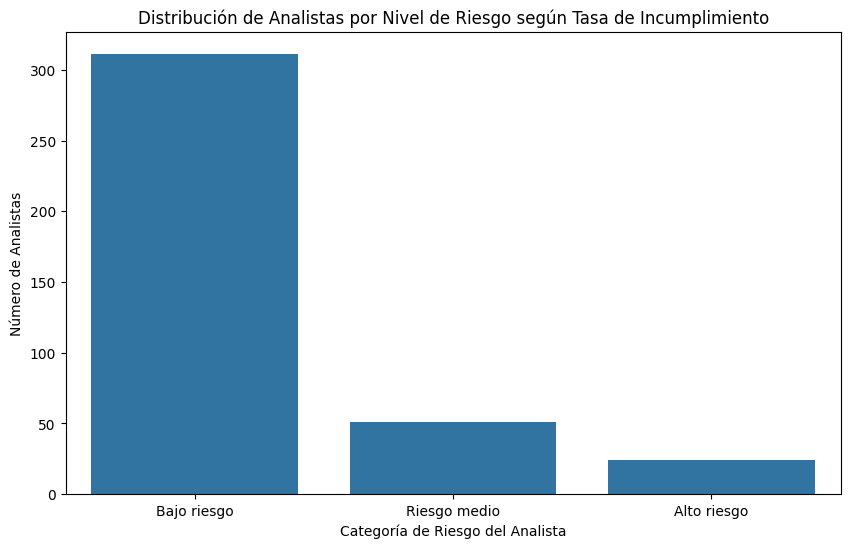

In [ ]:
# Visualización 

plt.figure(figsize=(10,6))
sns.countplot(data=df_tasa_incumplimiento, x='categoria_riesgo')
plt.xlabel("Categoría de Riesgo del Analista")
plt.ylabel("Número de Analistas")
plt.title("Distribución de Analistas por Nivel de Riesgo según Tasa de Incumplimiento")
plt.show()


¿El desempeño de los analistas sigue patrones específicos o es aleatorio?

In [ ]:
#Aplicar una chi2

from scipy.stats import chi2_contingency

# Crear la tabla de contingencia (filas: analistas, columnas: estado de crédito)
tabla_contingencia = pd.crosstab(df['analista'], df['estado_categoria'])

# Mostrar la tabla
print(tabla_contingencia)


estado_categoria  bueno  indeterminado  malo
analista                                    
ACX                   9              0     0
ADR                   6              1     0
AIL                   0             11     0
AIZ                   3              0     0
AJI                   0              2     0
...                 ...            ...   ...
SON                  14              0     1
WBZ                   3              1     0
YMG                   0             11     0
YPN                  16              1     3
ZUL                   6              0     1

[386 rows x 3 columns]


In [ ]:
# Aplicar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Evaluar la significancia estadística
if p < 0.05:
    print("Conclusión: Existen diferencias significativas en las tasas de incumplimiento entre los analistas.")
else:
    print("Conclusión: No hay evidencia estadística de que las tasas de incumplimiento varíen entre los analistas.")


Chi-cuadrado: 3047.36303536123
Valor p: 2.115539047786252e-267
Conclusión: Existen diferencias significativas en las tasas de incumplimiento entre los analistas.


Conclusiones

- La correlación entre "Analista" y "Riesgo" es baja, lo que sugiere que no hay una relación numérica fuerte.
- El hecho de que 15 (3,88%) de 386 analistas aprueben más créditos de alto riesgo puede indicar una tendencia real o que puede atribuirse a un simple error o aleatoriedad. Para entender mejor la causa, sería recomendable analizar la relación con otros factores como la ubicación geográfica y el tipo de crédito otorgado.
- La tabla de contingencia muestra qué analistas aprueban más créditos de alto riesgo.
- Las tasas de incumplimiento varían significativamente entre los analistas. Esto indica que algunos analistas están aprobando más créditos riesgosos que otros de una manera que no es aleatoria.
- El riesgo de los créditos no está distribuido equitativamente entre todos los analistas. Algunos analistas están asignando más créditos que terminan en "castigo" o "cobro judicial", mientras que otros tienen tasas de incumplimiento más bajas.

### **Monto vs Riesgo**

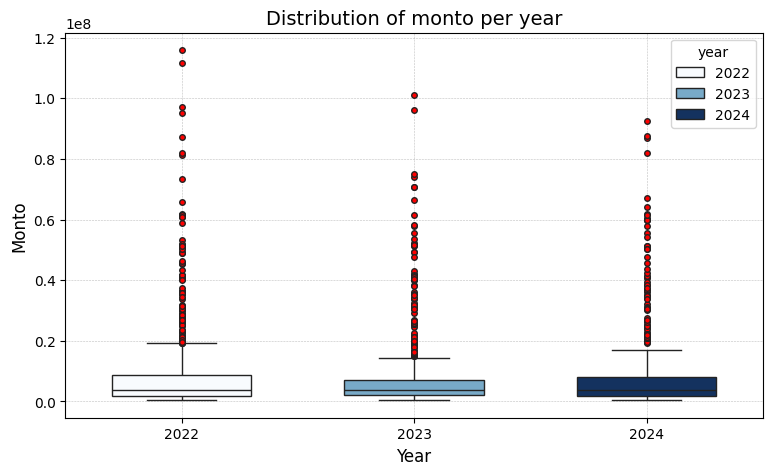

In [ ]:
# Monto vs Año

# # Boxplot - monto per risk

plt.figure(figsize=(9, 5))
sns.boxplot(
    x=df["year"],
    y=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=df["year"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)


plt.title("Distribution of monto per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Monto", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

In [ ]:
# Lets check the monto per riesgo level

df.groupby(by="year").agg(
    {
        "monto": [
            ("#","count"),
            ("min","min"),
            ("Q 10",lambda x: round(x.quantile(q=0.1),3)),
            ("Promedio", "mean"),
            ("Q 90",lambda x: round(x.quantile(q=0.9),3)),
            ("max","max")
        ]
    }
)

monto                                                        
         #     min       Q 10      Promedio        Q 90        max
year                                                              
2022  1285  400000  1011920.0  8.544114e+06  25685800.0  115832618
2023  1023  400000  1424283.4  7.108125e+06  13699954.0  100983196
2024   608  400000   600000.0  8.508897e+06  21094315.2   92506564

--> We can't notice a difference between the loan amounts over the years.

**Monto vs riesgo**

In [ ]:
# outliers monto

# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

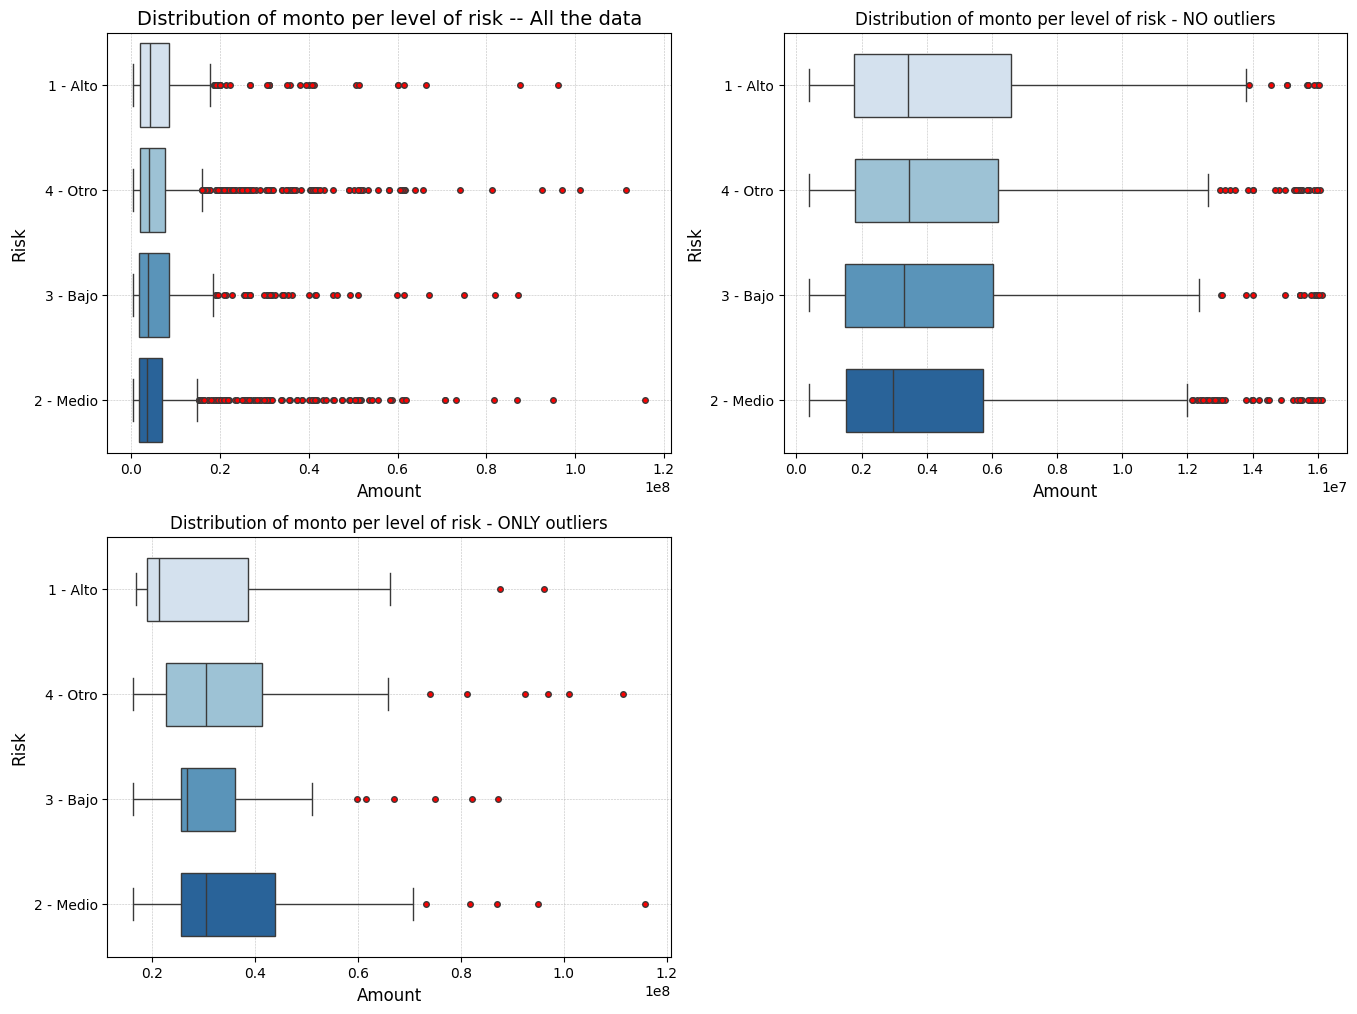

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
# Boxplot - monto per risk

sns.boxplot(
    y=df["riesgo"],
    x=df["monto"],
    palette="Blues",
    linewidth=1,
    width=0.8,
    hue=df["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)



plt.title("Distribution of monto per level of risk -- All the data", fontsize=14)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)



# plt.legend().remove()


plt.subplot(2, 2, 2)

# Boxplot - monto per risk WITHOUT OUTLIERS
temp = df[df["monto"] < upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - NO outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)



plt.subplot(2, 2, 3)

# Boxplot - monto per risk ONLY OUTLIERS
temp = df[df["monto"] > upper_limit]

sns.boxplot(
    x=temp["monto"],
    y=temp["riesgo"],
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["riesgo"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per level of risk - ONLY outliers", fontsize=12)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Risk", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)


plt.show()

Comments

--> We can notice some differences in the distribution of the microcredit amount by risk level when using only the data without outliers and when using the data with only outliers.  
This indicates that there is a possible difference in the relationship between the two variables in the two sets of observations.  
There is the possibility of creating different models according to the threshold amount to capture this pattern.

**Monto vs actividad**

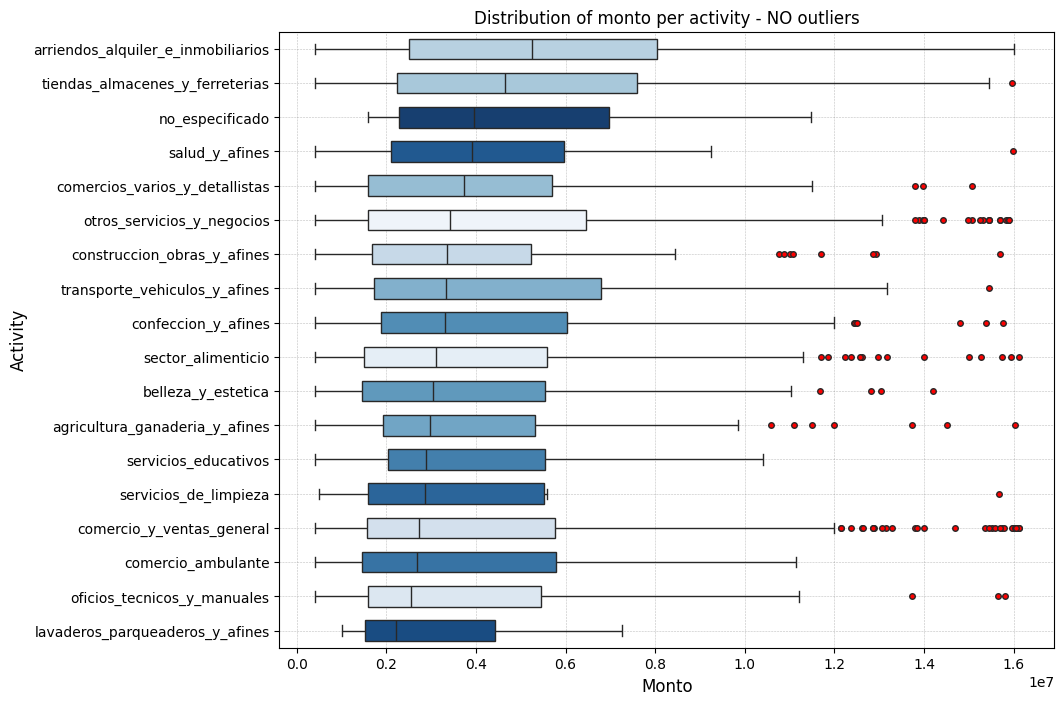

In [ ]:
# Boxplot - monto per activity WITHOUT OUTLIERS

temp = df[df["monto"] < upper_limit]

order = (
    temp.groupby("actividad_v2")["monto"].median().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 8))
sns.boxplot(
    x=temp["monto"],
    y=temp["actividad_v2"],
    order=order,
    palette="Blues",
    linewidth=1,
    width=0.6,
    hue=temp["actividad_v2"],
    flierprops=dict(marker="o", markerfacecolor="red", markersize=4),
)

plt.title("Distribution of monto per activity - NO outliers", fontsize=12)
plt.xlabel("Monto", fontsize=12)
plt.ylabel("Activity", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.4, alpha=0.5)

plt.show()

**Actividad vs riesgo**

In [ ]:
print("Frequency of audit´s risk per activity:\n")

cross_tab = pd.crosstab(df.actividad_v2, df.riesgo, margins=True).sort_values(
    by="All", ascending=False
)
cross_tab

Frequency of audit´s risk per activity:



riesgo,1 - Alto,2 - Medio,3 - Bajo,4 - Otro,All
actividad_v2,,,,,
All,325,1084,423,1084,2916
comercio_y_ventas_general,70,224,100,199,593
otros_servicios_y_negocios,59,198,70,162,489
sector_alimenticio,37,155,67,150,409
tiendas_almacenes_y_ferreterias,22,73,37,70,202
oficios_tecnicos_y_manuales,26,68,22,72,188
agricultura_ganaderia_y_afines,25,74,15,71,185
belleza_y_estetica,18,61,20,59,158
confeccion_y_afines,12,46,27,55,140


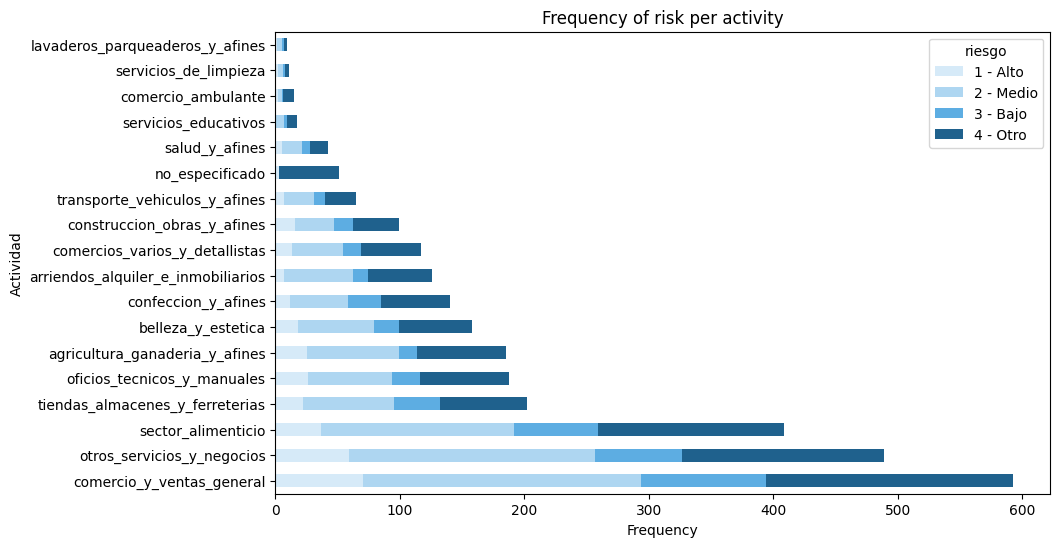

In [ ]:
colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_tab.drop("All", axis=0).drop("All", axis=1).plot(
    kind="barh", stacked=True, figsize=(10, 6), color=colors
)
plt.title(f"Frequency of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Frequency")
plt.show()

Percentage of audit´s risk per activity:



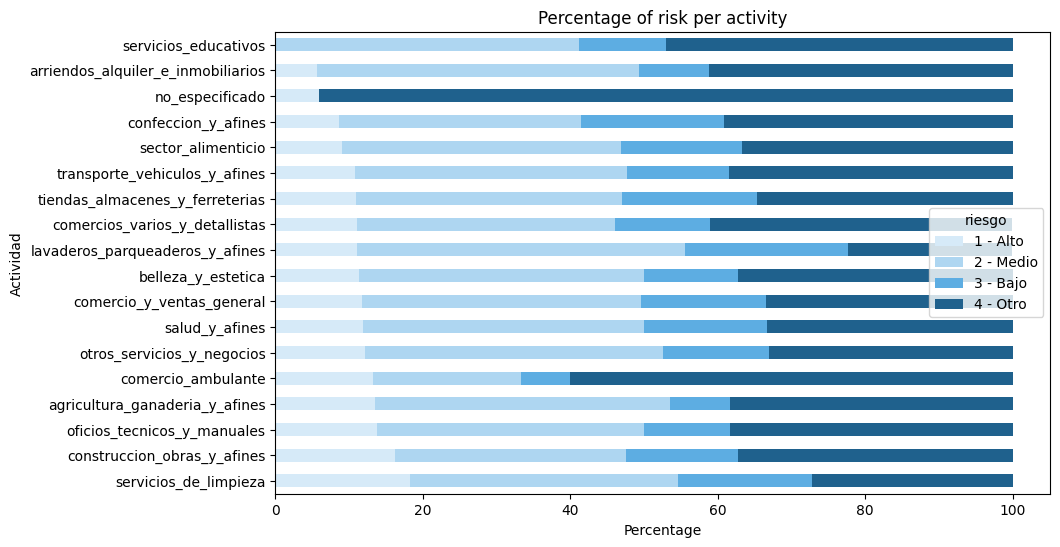

In [ ]:
print("Percentage of audit´s risk per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by="1 - Alto", ascending=False
)
# cross_table

colors = ["#D6EAF8", "#AED6F1", "#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
plt.title(f"Percentage of risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

Percentage of risk (binary) per activity:

riesgo_bin                             0     1
actividad_v2                                  
lavaderos_parqueaderos_y_afines     22.2  77.8
servicios_de_limpieza               27.3  72.7
otros_servicios_y_negocios          33.1  66.9
salud_y_afines                      33.3  66.7
comercio_y_ventas_general           33.6  66.4
tiendas_almacenes_y_ferreterias     34.7  65.3
sector_alimenticio                  36.7  63.3
belleza_y_estetica                  37.3  62.7
construccion_obras_y_afines         37.4  62.6
oficios_tecnicos_y_manuales         38.3  61.7
agricultura_ganaderia_y_afines      38.4  61.6
transporte_vehiculos_y_afines       38.5  61.5
confeccion_y_afines                 39.3  60.7
comercios_varios_y_detallistas      41.0  59.0
arriendos_alquiler_e_inmobiliarios  41.3  58.7
servicios_educativos                47.1  52.9
comercio_ambulante                  60.0  40.0
no_especificado                     94.1   5.9


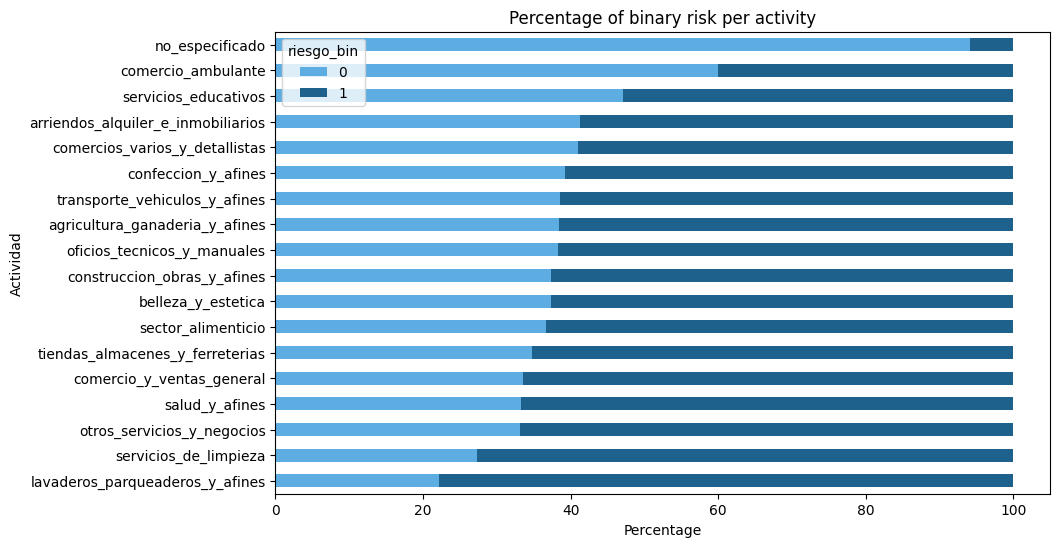

In [ ]:
print("Percentage of risk (binary) per activity:\n")

cross_table = pd.crosstab(df.actividad_v2, df.riesgo_bin, normalize="index") * 100
cross_table = cross_table.apply(lambda x: round(x, 1)).sort_values(
    by=1, ascending=False
)
print(cross_table)

colors = ["#5DADE2", "#1F618D"]
cross_table.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
plt.title(f"Percentage of binary risk per activity")
plt.ylabel("Actividad")
plt.xlabel("Percentage")
plt.show()

chi-square test

In [ ]:
chi2, p, dof, expected = chi2_contingency(
    cross_tab.drop("All", axis=0).drop("All", axis=1)
)
print(f"Chi-square: {chi2}, p-value: {p}")
if p < 0.05:
    print("There is a significant association between the activity and the risk.")
else:
    print("No significant association was found between the activity and the risk.")

Chi-square: 119.72091749164116, p-value: 1.8803444232488228e-07
There is a significant association between the activity and the risk.


Comments

We can observe the difference in the frequency of client activities, with a higher frequency of bank clients in commerce and food sector activities such as restaurants and food sales; on the other hand, the least frequent activities are street commerce, parking lots and cleaning services.    

With respect to conclusions on the relationship between risk and activity:    
- We can notice that the proportion of risky credits is not the same for all activities. There are activities with a higher percentage of risk compared to the others.
- The activities that apparently have a higher proportion of risky loans are: Vehicle services, such as car washes and parking, cleaning services, health services such as drugstores.
- The activities with the lowest apparent risk are street commerce, educational services such as teachers, and leasing or rentals.
- We can mention that with a 95% confidence level, there is an association between risk and the activity of the credit client.



**Actividad vs Riesgo vs Monto**

Mean of monto(*10^6) per audit's risk per activity:



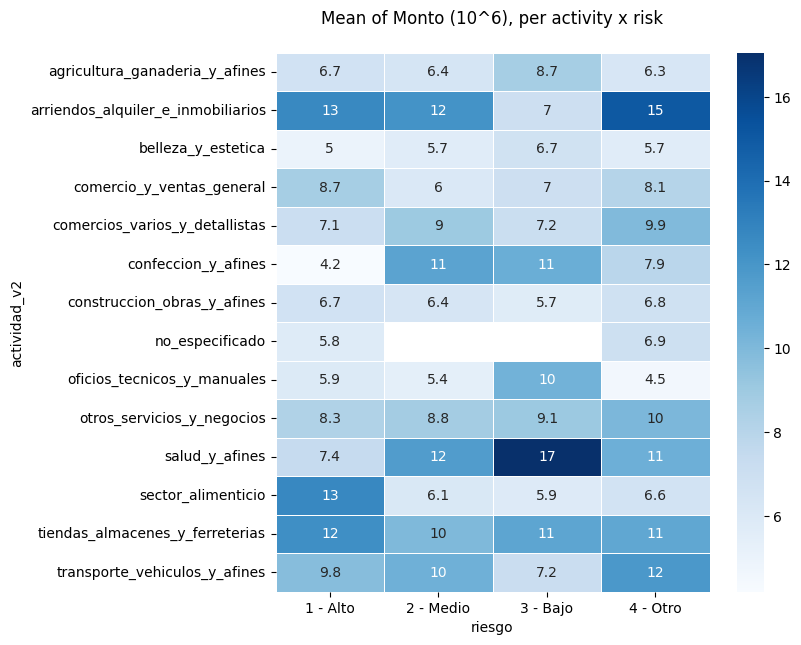

In [ ]:
print("Mean of monto(*10^6) per audit's risk per activity:\n")

# Drop activities with low frequencies
activities = cross_tab.iloc[0:-4, :].drop("All", axis=0).index
temp = df[(df["actividad_v2"].isin(activities))]

# Crosstab and heatmap
monto = temp.monto.apply(lambda x: x / 1000000)
cross_table = pd.crosstab(
    temp.actividad_v2, temp.riesgo, values=monto, aggfunc="mean"
).apply(lambda x: round(x, 2))
cross_table

plt.figure(figsize=(7, 7))
sns.heatmap(cross_table, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Mean of Monto (10^6), per activity x risk\n")
plt.show()

Comments

In the graph above, we can analyze the relationship between activity, risk and loan amounts.  
We notice that the average loans are not equal for the different activities, being activities such as salud_y_afines, tiendas_almacenes and arriendos_alquileres those with higher average amounts.

### **Plazo Vs Riesgo**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_excel('hallazgos_clean.xlsx')

df.head()

,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,fecha_desembolso,...,calificacion_cartera,relaciones_laborales,oficina,zona,regional,estado,year,tipo,riesgo,riesgo_int
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros,15069268,792642,36,2021-06-11,...,Si,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad,1 - Alto,1
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,2021-06-15,...,No,Si,poblado,1,1,castigo,2022,afecta estabilidad,1 - Alto,1
2,2,Jose Armando Agudelo Gomez,HZT,No_especificado,gallera_trebol,otros,1433360,178915,15,2022-10-02,...,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad,1 - Alto,1
3,3,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,2022-05-03,...,Si,Si,dosquebradas,12,4,modificado,2022,afecta estabilidad,1 - Alto,1
4,4,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,otros,1055378,205648,6,2022-03-11,...,Si,no_especificado,tulua,3,1,cancelada,2022,afecta estabilidad,1 - Alto,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'cliente', 'analista', 'tipo_credito', 'actividad',
       'actividad_v2', 'monto', 'cuota', 'plazo', 'fecha_desembolso',
       'visita_analista_credito', 'categoria', 'hallazgo', 'tipo_hallazgo',
       'calificacion_cartera', 'relaciones_laborales', 'oficina', 'zona',
       'regional', 'estado', 'year', 'tipo', 'riesgo', 'riesgo_int'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df['riesgo_int'].corr(df['plazo'])

-0.005853914663085247

In [ ]:
pd.crosstab(df.riesgo_int, df.plazo)

plazo,2,3,4,5,6,7,8,9,10,12,...,52,53,54,57,59,62,72,462,626,913
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,6,0,29,0,3,32,...,0,0,0,0,10,0,0,0,1,0
2,5,2,9,2,33,2,130,0,9,118,...,0,0,2,1,41,1,0,0,0,1
3,1,2,2,0,9,0,52,1,1,49,...,0,0,1,0,16,0,0,0,0,0
4,3,2,7,0,16,3,91,1,16,98,...,3,1,0,0,35,0,1,1,0,0


In [ ]:
df['riesgo_int'].corr(df['plazo'])**2

3.4268316882684465e-05

Análisis de correlación de datos sin y con outliers

In [ ]:
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

In [ ]:
df_without_outliers = df[(df.monto >= lower_limit) & (df.monto <= upper_limit)]
df_with_outliers = df[(df.monto < lower_limit) | (df.monto > upper_limit)]

In [ ]:
df_with_outliers['riesgo_int'].corr(df_with_outliers['plazo'])

0.006494650744591193

In [ ]:
pd.crosstab(df_with_outliers.riesgo_int, df_with_outliers.plazo)

plazo,12,15,18,20,24,28,29,30,32,36,...,45,46,48,50,52,53,54,59,62,72
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,3,0,0,1,0,21,...,0,0,7,0,0,0,0,8,0,0
2,4,1,1,0,12,1,0,2,0,23,...,1,1,30,0,0,0,1,37,1,0
3,0,0,3,0,9,0,0,1,0,12,...,0,0,13,0,0,0,0,13,0,0
4,1,0,6,0,11,0,1,3,1,36,...,0,0,27,1,3,1,0,31,0,1


In [ ]:
df_with_outliers['riesgo_int'].corr(df_with_outliers['plazo'])**2

4.2180488294218935e-05

In [ ]:
df_without_outliers['riesgo_int'].corr(df_without_outliers['plazo'])

-0.007801938012541147

In [ ]:
pd.crosstab(df_without_outliers.riesgo_int, df_without_outliers.plazo)

plazo,2,3,4,5,6,7,8,9,10,12,...,43,44,45,48,54,57,59,462,626,913
riesgo_int,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,6,0,29,0,3,32,...,0,0,0,7,0,0,2,0,1,0
2,5,2,9,2,33,2,130,0,9,114,...,1,0,1,26,1,1,4,0,0,1
3,1,2,2,0,9,0,52,1,1,49,...,0,0,0,10,1,0,3,0,0,0
4,3,2,7,0,16,3,91,1,16,97,...,1,1,0,15,0,0,4,1,0,0


In [ ]:
df_without_outliers['riesgo_int'].corr(df_without_outliers['plazo'])**2

6.0870236751534506e-05

**Boxplots de comparacion**

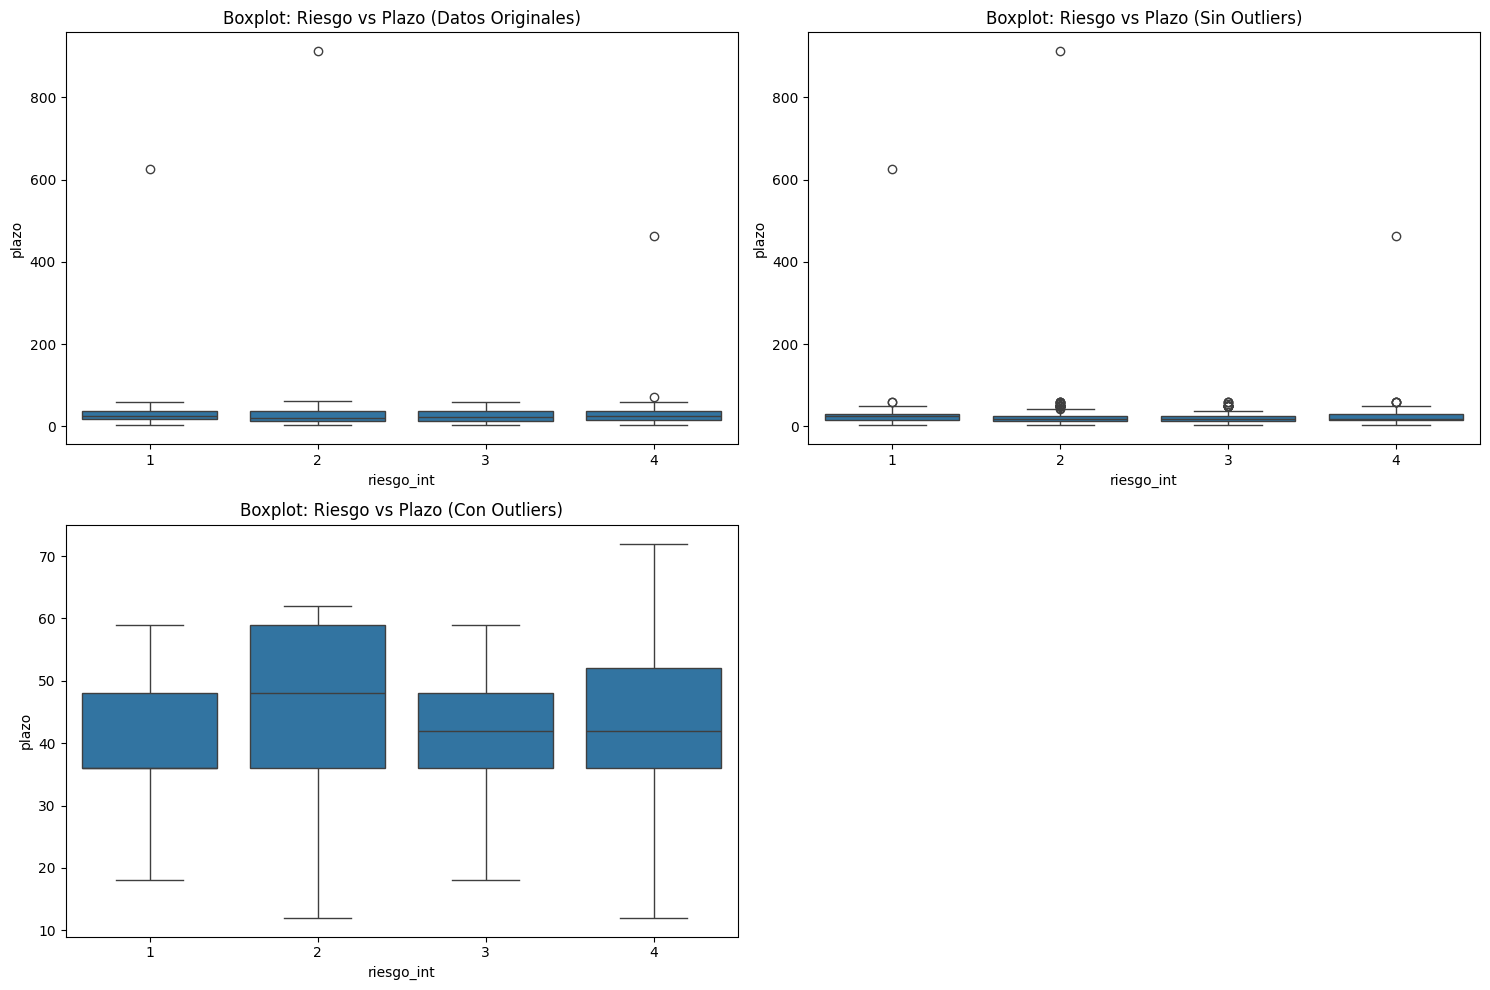

In [ ]:

# Boxplots para comparar
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x=df['riesgo_int'], y=df['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Datos Originales)")


plt.subplot(2, 2, 2)
sns.boxplot(x=df_without_outliers['riesgo_int'], y=df_without_outliers['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Sin Outliers)")


plt.subplot(2, 2, 3)
sns.boxplot(x=df_with_outliers['riesgo_int'], y=df_with_outliers['plazo'])
plt.title("Boxplot: Riesgo vs Plazo (Con Outliers)")

plt.tight_layout()
plt.show()


Tras realizar distintos análisis estadísticos y visuales, se determinó que el **plazo del crédito no es un factor determinante** en el nivel de riesgo de los microcréditos.  

1. **Análisis de correlación**  
   - El coeficiente de correlación (\( R^2 \)) obtenido es **extremadamente bajo** (≈ 0.000034), lo que indica **una relación prácticamente inexistente** entre el plazo del crédito y el riesgo asociado.  

2. **Tablas de contingencia**  
   - La distribución de los niveles de riesgo en diferentes plazos **no muestra un patrón significativo**, lo que sugiere que el plazo **no influye directamente en la clasificación del riesgo**.  

3. **Boxplots comparativos**  
   - Los diagramas de caja (boxplots) comparativos no evidenciaron diferencias claras en la distribución del riesgo en función del plazo.  
   - Incluso después de eliminar outliers, la tendencia sigue siendo la misma, lo que refuerza la idea de que el plazo no impacta significativamente el nivel de riesgo.  

### **Oficina vs Riesgo**

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

Load packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Load data

In [ ]:
df = pd.read_excel(r'C:\Users\Usuario\OneDrive - Centro Cultural Colombo Americano\Documentos\ICESI\ANALISIS DE DATOS 1\Proyecto\Analitica_1\Data\output_data\hallazgos_clean.xlsx')

Variable selected

In [ ]:
var1 = 'oficina'
var2 = 'riesgo'

Type of data

In [ ]:
print(df[[var1, var2]].dtypes)

oficina    object
riesgo     object
dtype: object


Contingency table

In [ ]:
contingency_table = pd.crosstab(df[var1], df[var2])
print(f'Contingency Table:\n{contingency_table}')

Contingency Table:
riesgo           1 - Alto  2 - Medio  3 - Bajo  4 - Otro
oficina                                                 
alfonso lópez           6         15         1        12
apartado                2          6         0         6
armenia sur             1         15         1        28
autopista norte         3         27         0         4
barranquilla            3         27         4         4
...                   ...        ...       ...       ...
sur                     6         33         4         6
tulua                   9         32        28        22
tulua calle 25          3         43         7         1
villeta                 5         19         6         9
zipaquira               1         15        11         3

[61 rows x 4 columns]


Stacked bar chart

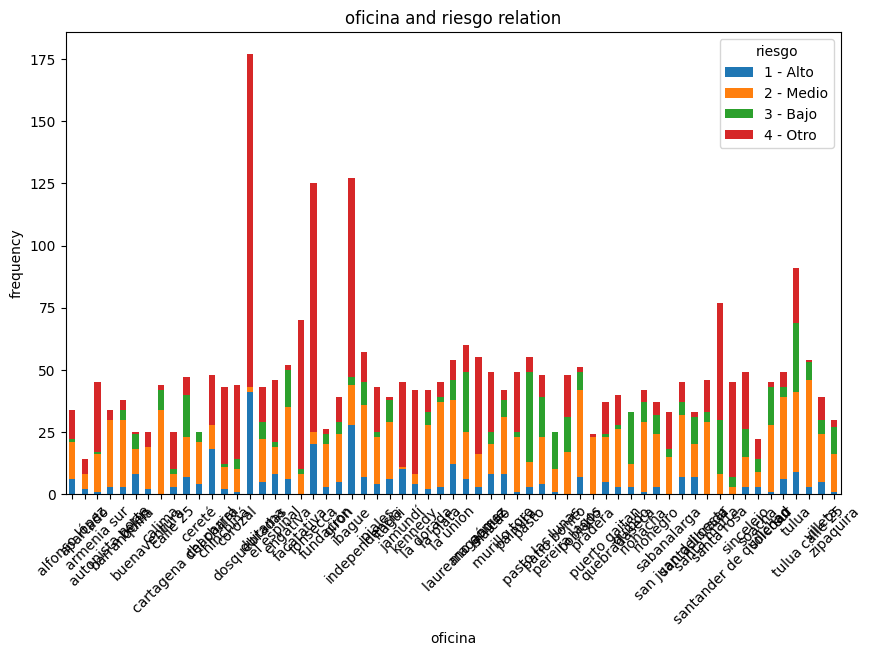

In [ ]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'{var1} and {var2} relation')
plt.xticks(rotation=45)
plt.ylabel('frequency')
plt.show()

Normalized bar chart

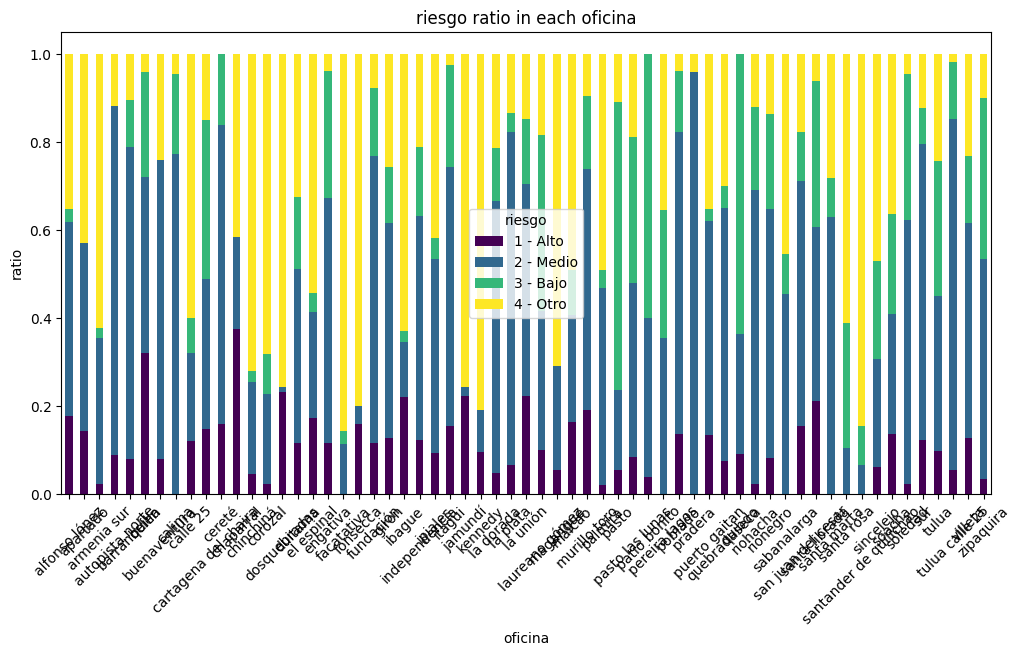

In [ ]:
table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)
table_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title(f'{var2} ratio in each {var1}')
plt.xticks(rotation=45)
plt.ylabel('ratio')
plt.legend(title=var2)
plt.show()

Chi-square test

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square: {chi2}, p-value: {p}')
if p < 0.05:
    print('There is a significant association between the variables.')
else:
    print('No significant association was found between the variables.')

Chi-square: 1680.2623061964741, p-value: 1.71173608350837e-241
There is a significant association between the variables.


Further Analysis

In [ ]:
print("\nAdditional Analysis:")
print("- This shows which branches have a higher proportion of each risk level.")
print("- If a branch has a high percentage in a single risk level, it could indicate a tendency to classify clients in a certain way.")
print("- This could be influenced by internal factors (credit policies) or external factors (regional economic conditions).")


Additional Analysis:
- This shows which branches have a higher proportion of each risk level.
- If a branch has a high percentage in a single risk level, it could indicate a tendency to classify clients in a certain way.
- This could be influenced by internal factors (credit policies) or external factors (regional economic conditions).


# **3. Data preparation**

In this notebook we will do some data preparation and feature engineering process before the modelling phase

## 3.1 Data preprocessing

In this section we will complete the cleaning and structuring of the dataset, in order to avoid inconveniences in the modeling stage.

1. First, lets remove all the variables that can only be measured after an audit. It is important to drop this columns because they can cause problems such as **data leakage**.  
2. We will remove all columns that do not give us valuable information, such as the customer's name. 
3. We will cast the format of the zone and region variables to object type, since they are nominal variables, not ordinals.
4. As a finding of the exploratory data analysis, we will perform a filtering of outliers of the loan term variable.

In [ ]:
# Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings


from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [ ]:
# Load data

filename = "data_prep_&_FE.ipynb"  # Current file name
print(f"Current file name: {filename}\n")
print(f"Current absolute path: {os.getcwd()}\n")

# Specify the paths, relative to the current file
ACTUAL_DIR = os.path.dirname(os.path.abspath(filename))
BASE_DIR = os.path.dirname(ACTUAL_DIR)
DATA_DIR = os.path.join(BASE_DIR, "Data")
OUTPUT_DIR = os.path.join(DATA_DIR, "output_data")

print(f"BASE_DIR: {BASE_DIR}")
print(f"DATA_DIR: {DATA_DIR}")
print(f"OUTPUT_DIR: {OUTPUT_DIR}")

In [ ]:
df = pd.read_excel(os.path.join(OUTPUT_DIR, "hallazgos_clean.xlsx")).iloc[:, 1:]

In [ ]:
df.info()

In [ ]:
df.dropna(subset="fecha_desembolso",inplace=True)

In [ ]:
# 1- drop columns to avoid data leakage
df.drop(["hallazgo","calificacion_cartera","relaciones_laborales", "tipo","categoria","tipo_hallazgo"],axis=1,inplace=True)

# 2- drop columns withut valuable information
df.drop(["year","cliente","actividad", "riesgo"],axis=1,inplace=True)

# 3 Cast the "zona" and "regional" to object variables
df[["zona","regional"]] = df[["zona","regional"]].astype(object)


In [ ]:
# 4 identify the outliers of term of the loan and drop it

# Q1, Q3 & IQR
Q1 = np.percentile(df.plazo, 25)  # Q1 (25%)
Q3 = np.percentile(df.plazo, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 3 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 3 * IQR

print(f'Outliers upper limit: {upper_limit}')
print(f'Outliers lower limit: {lower_limit}')

# Identify outlier
outliers = df.plazo[(df.plazo < lower_limit) | (df.plazo > upper_limit)]
upper_outliers = df[(df.plazo > upper_limit)]

df = df[df["plazo"]<upper_limit]
print(f'\nNew shape of dataset: {df.shape}')

Outliers upper limit: 102.0
Outliers lower limit: 0

New shape of dataset: (2910, 14)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2910 entries, 0 to 2915
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   analista                 2910 non-null   object        
 1   tipo_credito             2910 non-null   object        
 2   actividad_v2             2910 non-null   object        
 3   monto                    2910 non-null   int64         
 4   cuota                    2910 non-null   int64         
 5   plazo                    2910 non-null   int64         
 6   oficina                  2910 non-null   object        
 7   zona                     2910 non-null   object        
 8   regional                 2910 non-null   object        
 9   fecha_desembolso         2910 non-null   datetime64[ns]
 10  visita_analista_credito  2121 non-null   datetime64[ns]
 11  estado                   2910 non-null   object        
 12  riesgo_int               2910 non-null 

## 3.2 Feature engineering

--> In this section, we aim to transform and create new features that improve the performance of the model. Moreover, we will do:  
1. Creation of new variables from the existing ones.
2. Extraction of information from time series or spatial data. 
3. Division of the dataset based on loan amounts.
4. Coding of categorical variables (one-hot encoding).  
5. Creation of pipelines. 

### 3.2.1 Creation and modification of features

--> We proceed to create new variables in search of better model performance.

#### New dates columns

In [3]:
df[["fecha_desembolso","visita_analista_credito"]].info()

NameError: name 'df' is not defined

In [ ]:
# First, we are gonna create some temporal variables in order to capture patterns

# Day of the week of the disbursement
df["dia_semana_desembolso"] = df["fecha_desembolso"].dt.weekday

# Day of the month of the disbursement
df["dia_mes_desembolso"] = df["fecha_desembolso"].dt.day

# Month of the disbursement
df["mes_desembolso"] = df["fecha_desembolso"].dt.month

# Difference in days between the analyst's visit and the disbursement (NaN if any date is missing)
df["dias_desde_visita_a_desembolso"] = (df["fecha_desembolso"] - df["visita_analista_credito"]).dt.days

# Is the disbursement on a weekend? (1 = Yes, 0 = No)
df["desembolso_fin_de_semana"] = df["fecha_desembolso"].dt.weekday.isin([5, 6]).astype(int)

# Is the disbursement at the end of the month? (1 = Yes, 0 = No)
df["desembolso_fin_de_mes"] = df["fecha_desembolso"].dt.day.isin([28, 29, 30, 31]).astype(int)

In [ ]:
# Finally, lets drop the datetime variables

df = df.drop(["fecha_desembolso","visita_analista_credito"],axis=1)

In [ ]:
df[
    [
        "dia_semana_desembolso",
        "dia_mes_desembolso",
        "mes_desembolso",
        "dias_desde_visita_a_desembolso",
        "desembolso_fin_de_semana",
        "desembolso_fin_de_mes",
    ]
].describe()

,dia_semana_desembolso,dia_mes_desembolso,mes_desembolso,dias_desde_visita_a_desembolso,desembolso_fin_de_semana,desembolso_fin_de_mes
count,2910.000000,2910.000000,2910.000000,2121.000000,2910.000000,2910.000000
mean,2.612027,20.201031,6.656701,1.742103,0.124399,0.280069
std,1.549124,8.343341,2.905646,28.160908,0.330092,0.449110
min,0.000000,1.000000,1.000000,-366.000000,0.000000,0.000000
25%,1.000000,13.000000,5.000000,1.000000,0.000000,0.000000
50%,3.000000,21.000000,7.000000,2.000000,0.000000,0.000000
75%,4.000000,28.000000,9.000000,5.000000,0.000000,1.000000
max,6.000000,31.000000,12.000000,381.000000,1.000000,1.000000


It is interesting to note that the variable "dias_desde_visita_a_desembolso" presents high negative and high positive values. These values are not the majority, they may be errors and need further analysis with the bank's team.  

 --> For this analysis, **we would modify the "dias_desde_visita_a_desembolso" column in order to avoid the extreme values**. We will turn NAN some of that values.

In [ ]:
print(f'Number of audits with the analyst visit after the disburment: {df[df["dias_desde_visita_a_desembolso"] < 0].shape[0]}')
print(f'Number of audits with the analyst visit before the disburment: {df[df["dias_desde_visita_a_desembolso"] > 0].shape[0]}')

print(f'Number of NaN values for "dias_desde_visita_a_desembolso": {df["dias_desde_visita_a_desembolso"].isna().sum()}')

# Considering only 21 days (3 weeks) before or after the loan disbursement
df["dias_desde_visita_a_desembolso"] = np.where(
    df["dias_desde_visita_a_desembolso"] < -21,
    np.nan,
    np.where(
        df["dias_desde_visita_a_desembolso"] > 21,
        np.nan,
        df["dias_desde_visita_a_desembolso"],
    ),
)
print("\nAfter modification:\n")

print(f'Number of audits with the analyst visit after the disburment: {df[df["dias_desde_visita_a_desembolso"] < 0].shape[0]}')
print(f'Number of audits with the analyst visit before the disburment: {df[df["dias_desde_visita_a_desembolso"] > 0].shape[0]}')
print(f'Number of NaN values for "dias_desde_visita_a_desembolso": {df["dias_desde_visita_a_desembolso"].isna().sum()}')

Number of audits with the analyst visit after the disburment: 74
Number of audits with the analyst visit before the disburment: 1670
Number of NaN values for "dias_desde_visita_a_desembolso": 789

After modification:

Number of audits with the analyst visit after the disburment: 23
Number of audits with the analyst visit before the disburment: 1632
Number of NaN values for "dias_desde_visita_a_desembolso": 878


#### New location-office columns

We will develop a couple of columns taking in consideration the ubication of the offices.  
We are taking into account the following information about the bank offices:  
 https://www.bancow.com.co/wp-content/uploads/2024/06/Horarios-Actuales-Oficinas-Banco-W.pdf    

In [ ]:
df.oficina.unique()

array(['dosquebradas', 'tulua', 'independencia', 'laureano_gómez',
       'quibdo', 'puerto_gaitan', 'pasto_las_lunas', 'ipiales',
       'la_unión', 'poblado', 'pasto', 'cartagena_del_chaira',
       'sincelejo', 'facatativa', 'engativa', 'tulua_calle_25',
       'santa_rosa', 'pereira_lagos', 'santa_marta', 'duitama', 'corozal',
       'soledad', 'santander_de_quilichao', 'ibague', 'santa_librada',
       'chaparral', 'murillo_toro', 'belen', 'alfonso_lópez', 'zipaquira',
       'riohacha', 'la_dorada', 'armenia_sur', 'calima', 'fonsecca',
       'sabanalarga', 'cereté', 'rionegro', 'san_juan_del_cesar',
       'quebradaseca', 'giron', 'itagui', 'soacha', 'villeta',
       'barranquilla', 'pradera', 'patio_bonito', 'chinchiná', 'la_plata',
       'autopista_norte', 'jamundí', 'kennedy', 'sur', 'palmira',
       'maicao', 'el_espinal', 'magangue', 'apartado', 'calle_25',
       'fundación', 'buenaventura'], dtype=object)

In [ ]:

# Dictionary of distances to the capital of the department (aprox)
distancias_aprox = {
    "dosquebradas": 10, "poblado": 5, "tulua": 100, "independencia": 3, "laureano_gómez": 5,
    "quibdo": 0, "puerto_gaitan": 180, "pasto_las_lunas": 0, "ipiales": 80, "la_unión": 120,
    "pasto": 0, "cartagena_del_chaira": 250, "sincelejo": 0, "facatativa": 45, "engativa": 10,
    "tulua_calle_25": 100, "santa_rosa": 20, "pereira_lagos": 5, "santa_marta": 0, "duitama": 50,
    "corozal": 15, "soledad": 5, "santander_de_quilichao": 80, "ibague": 0, "santa_librada": 10,
    "chaparral": 150, "murillo_toro": 30, "belen": 5, "alfonso_lópez": 5, "zipaquira": 45,
    "riohacha": 0, "la_dorada": 120, "armenia_sur": 5, "calima": 90, "fonsecca": 60,
    "sabanalarga": 40, "cereté": 20, "rionegro": 30, "san_juan_del_cesar": 100, "quebradaseca": 5,
    "giron": 10, "itagui": 10, "soacha": 20, "villeta": 80, "barranquilla": 0, "pradera": 35,
    "patio_bonito": 15, "chinchiná": 30, "la_plata": 180, "autopista_norte": 5, "jamundí": 25,
    "kennedy": 10, "sur": 5, "palmira": 20, "maicao": 80, "el espinal": 30, "magangue": 200,
    "apartado": 310, "calle_25": 100, "fundación": 70, "buenaventura": 120
}

# List of rural cities according to:
ciudades_rurales = {"puerto_gaitan", "cartagena_del_chaira", "san_juan_del_cesar", "fonsecca",
                    "sabanalarga", "la_unión", "chaparral", "la_plata", "apartado", "fundación"}

# Offices with their department
datos_oficinas = [(ciudad.lower(), depto) for ciudad, depto in [
    ("Dosquebradas", "Risaralda"), ("Poblado", "Antioquia"), ("Tulua", "Valle del Cauca"),
    ("Independencia", "Valle del Cauca"), ("Laureano_Gómez", "Valle del Cauca"), ("Quibdo", "Chocó"),
    ("Puerto_Gaitan", "Meta"), ("Pasto_Las_Lunas", "Nariño"), ("Ipiales", "Nariño"),
    ("La_Unión", "Valle del Cauca"), ("Pasto", "Nariño"), ("Cartagena_del_Chaira", "Caquetá"),
    ("Sincelejo", "Sucre"), ("Facatativa", "Cundinamarca"), ("Engativa", "Cundinamarca"),
    ("Tulua_Calle_25", "Valle del Cauca"), ("Santa_Rosa", "Risaralda"), ("Pereira_Lagos", "Risaralda"),
    ("Santa_Marta", "Magdalena"), ("Duitama", "Boyacá"), ("Corozal", "Sucre"), ("Soledad", "Atlántico"),
    ("Santander_de_Quilichao", "Cauca"), ("Ibague", "Tolima"), ("Santa_Librada", "Cundinamarca"),
    ("Chaparral", "Tolima"), ("Murillo_Toro", "Tolima"), ("Belen", "Antioquia"),
    ("Alfonso_López", "Valle del Cauca"), ("Zipaquira", "Cundinamarca"), ("Riohacha", "Guajira"),
    ("La_Dorada", "Caldas"), ("Armenia_Sur", "Quindío"), ("Calima", "Valle del Cauca"),
    ("Fonsecca", "Guajira"), ("Sabanalarga", "Atlántico"), ("Cereté", "Córdoba"),
    ("Rionegro", "Antioquia"), ("San_Juan_del_Cesar", "Guajira"), ("Quebradaseca", "Santander"),
    ("Giron", "Santander"), ("Itagui", "Antioquia"), ("Soacha", "Cundinamarca"),
    ("Villeta", "Cundinamarca"), ("Barranquilla", "Atlántico"), ("Pradera", "Valle del Cauca"),
    ("Patio_Bonito", "Cundinamarca"), ("Chinchiná", "Caldas"), ("La_Plata", "Huila"),
    ("Autopista_Norte", "Cundinamarca"), ("Jamundí", "Valle del Cauca"), ("Kennedy", "Cundinamarca"),
    ("Sur", "Valle del Cauca"), ("Palmira", "Valle del Cauca"), ("Maicao", "Guajira"),
    ("El_Espinal", "Tolima"), ("Magangue", "Bolívar"), ("Apartado", "Antioquia"),
    ("Calle_25", "Valle del Cauca"), ("Fundación", "Magdalena"), ("Buenaventura", "Valle del Cauca")
]]

df_oficinas = pd.DataFrame(datos_oficinas, columns=["oficina", "Departamento"])

# new columns per office
df_oficinas["distance_to_dto_capital"] = df_oficinas["oficina"].map(distancias_aprox)
df_oficinas["is_rural"] = df_oficinas["oficina"].apply(lambda x: 1 if x in ciudades_rurales else 0)


In [ ]:
df_oficinas

,oficina,Departamento,distance_to_dto_capital,is_rural
0,dosquebradas,Risaralda,10.0,0
1,poblado,Antioquia,5.0,0
2,tulua,Valle del Cauca,100.0,0
3,independencia,Valle del Cauca,3.0,0
4,laureano_gómez,Valle del Cauca,5.0,0
5,quibdo,Chocó,0.0,0
6,puerto_gaitan,Meta,180.0,1
7,pasto_las_lunas,Nariño,0.0,0
8,ipiales,Nariño,80.0,0
9,la_unión,Valle del Cauca,120.0,1


In [ ]:
# Join the information about the offices to the dataframe

df = df.merge(df_oficinas[["oficina","distance_to_dto_capital","is_rural"]], on="oficina", how="left")


#### Modify loan term column

We decided to group the loan term variable as follows

In [ ]:
print(f'Current number of different loan term values: {df.plazo.nunique()}')

Current number of different loan term values: 50


In [ ]:
df.plazo = pd.cut(df.plazo,[1,12,24,36,df.plazo.max()])
print("New distribution of loan term variable:\n")
df.plazo.value_counts()

New distribution of loan term variable:



plazo
(12, 24]    1229
(1, 12]      715
(24, 36]     643
(36, 72]     323
Name: count, dtype: int64

#### Modify credit status column

We decided to code the credit status variable as follows

In [ ]:
print(f'Current values: \n\n{df.estado.value_counts()}')

Current values: 

estado
normal             1059
cancelada           943
no_especificado     605
castigo             194
modificado           91
cobro judicial       13
reestructurado        5
Name: count, dtype: int64


In [ ]:
df.estado = np.where(
    df.estado.isin(["normal", "cancelada"]),
    "normal",
    np.where(df.estado.isin(["no_especificado"]), "no_especificado", "anormal"),
)


print("New distribution of loan term variable:\n")
df.estado.value_counts()

New distribution of loan term variable:



estado
normal             2002
no_especificado     605
anormal             303
Name: count, dtype: int64

#### Classes/functions - new analyst and office columns

--> In this section, we are going to define the classes and functions to create variables in the test data based on the training data, in order to avoid problems such as data leakage.

In [ ]:
# function for office - percentage of risky microcredits out of total assigned by office

class OfficeRiskRateTransformer(BaseEstimator, TransformerMixin):
    """
    Scikit-learn compatible transformer to calculate office risk rates.

    This transformer calculates:
    - 'office_risk_rate': Percentage of credits classified as risk levels 1, 2, or 3.
    - 'office_high_risk_rate': Percentage of credits classified as high risk (temp_riesgo_int = 1).

    The rates are computed on the training data (`fit`) and applied to new data (`transform`),
    preventing data leakage.

    Methods:
    - fit(X, y=None): Computes risk rates per office based on the training data.
    - transform(X): Applies the precomputed risk rates to new data.
    """

    def __init__(self):
        self.risk_rates_ = None  # Dictionary to store precomputed risk rates

    def fit(self, X, y=None):
        """Compute the risk rates based on the training data."""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        required_columns = {'oficina', 'temp_riesgo_int'}
        if not required_columns.issubset(X.columns):
            raise ValueError(f"Input DataFrame must contain columns: {required_columns}")

        # Group by 'oficina' and 'temp_riesgo_int', then count occurrences
        credit_count = X.groupby(['oficina', 'temp_riesgo_int']).size().unstack(fill_value=0)

        # Total number of approved credits per office
        total_credits = credit_count.sum(axis=1)

        # Count credits classified as risk levels 1, 2, or 3
        risky_credits = credit_count[[1, 2, 3]].sum(axis=1)

        # Count credits classified as high risk (temp_riesgo_int = 1)
        high_risk_credits = credit_count[1]

        # Compute risk rates
        risk_rate = (risky_credits / total_credits * 100).round(1)
        high_risk_rate = (high_risk_credits / total_credits * 100).round(1)

        # Store results in a dictionary
        self.risk_rates_ = pd.DataFrame({
            "oficina": credit_count.index,
            "office_risk_rate": risk_rate,
            "office_high_risk_rate": high_risk_rate
        }).reset_index(drop=True)

        return self

    def transform(self, X, drop_risk=True):
        """Apply the precomputed risk rates to new data."""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        required_columns = {'oficina', 'temp_riesgo_int'}
        if not required_columns.issubset(X.columns):
            raise ValueError(f"Input DataFrame must contain columns: {required_columns}")

        if self.risk_rates_ is None:
            raise RuntimeError("The transformer has not been fitted. Call 'fit' first.")

        # Merge with the precomputed risk rates
        X = X.merge(self.risk_rates_, left_on="oficina", right_on="oficina", how="left")

        # X = X.drop(["oficina"],axis=1)

        if drop_risk:
            X = X.drop(["temp_riesgo_int"],axis=1)
        
        return X

In [ ]:
# function for analyst - percentage of risky microcredits out of total assigned by analyst

class AnalystRiskRateTransformer(BaseEstimator, TransformerMixin):
    """
    Scikit-learn compatible transformer to calculate analyst risk rates.

    This transformer calculates:
    - 'analyst_risk_rate': Percentage of credits classified as risk levels 1, 2, or 3.
    - 'analyst_high_risk_rate': Percentage of credits classified as high risk (temp_riesgo_int = 1).

    The rates are computed on the training data (`fit`) and applied to new data (`transform`),
    preventing data leakage.

    Methods:
    - fit(X, y=None): Computes risk rates per analyst based on the training data.
    - transform(X): Applies the precomputed risk rates to new data.
    """

    def __init__(self):
        self.risk_rates_ = None  # Dictionary to store precomputed risk rates

    def fit(self, X, y=None):
        """Compute the risk rates based on the training data."""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        required_columns = {'analista', 'temp_riesgo_int'}
        if not required_columns.issubset(X.columns):
            raise ValueError(f"Input DataFrame must contain columns: {required_columns}")

        # Group by 'analista' and 'temp_riesgo_int', then count occurrences
        credit_count = X.groupby(['analista', 'temp_riesgo_int']).size().unstack(fill_value=0)

        # Total number of approved credits per analyst
        total_credits = credit_count.sum(axis=1)

        # Count credits classified as risk levels 1, 2, or 3
        risky_credits = credit_count[[1, 2, 3]].sum(axis=1)

        # Count credits classified as high risk (temp_riesgo_int = 1)
        high_risk_credits = credit_count[1]

        # Compute risk rates
        risk_rate = (risky_credits / total_credits * 100).round(1)
        high_risk_rate = (high_risk_credits / total_credits * 100).round(1)

        # Store results in a dictionary
        self.risk_rates_ = pd.DataFrame({
            "analista": credit_count.index,
            "analyst_risk_rate": risk_rate,
            "analyst_high_risk_rate": high_risk_rate
        }).reset_index(drop=True)

        return self

    def transform(self, X, drop_risk=True):
        """Apply the precomputed risk rates to new data."""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        required_columns = {'analista', 'temp_riesgo_int'}
        if not required_columns.issubset(X.columns):
            raise ValueError(f"Input DataFrame must contain columns: {required_columns}")

        if self.risk_rates_ is None:
            raise RuntimeError("The transformer has not been fitted. Call 'fit' first.")

        # Merge with the precomputed risk rates
        X = X.merge(self.risk_rates_, left_on="analista", right_on="analista", how="left")

        X = X.drop(["analista"],axis=1)

        if drop_risk:
            X = X.drop(["temp_riesgo_int"],axis=1)
        
        return X

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   analista                        2910 non-null   object  
 1   tipo_credito                    2910 non-null   object  
 2   actividad_v2                    2910 non-null   object  
 3   monto                           2910 non-null   int64   
 4   cuota                           2910 non-null   int64   
 5   plazo                           2910 non-null   category
 6   oficina                         2910 non-null   object  
 7   zona                            2910 non-null   object  
 8   regional                        2910 non-null   object  
 9   estado                          2910 non-null   object  
 10  riesgo_int                      2910 non-null   int64   
 11  riesgo_bin                      2910 non-null   int64   
 12  dia_semana_desembols

#### Dataset split

--> Taking into account the findings of the data analysis, **we proceed to make a separation of the data set between high and low amount data.**

In [ ]:
# Q1, Q3 & IQR
Q1 = np.percentile(df.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df.monto[(df.monto < lower_limit) | (df.monto > upper_limit)]
upper_outliers = df[(df.monto > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of microcredits consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df.shape[0]*100,2)}%')

Outliers upper limit: $16,245,709.5
Outliers lower limit: $0
Number of microcredits consider as outliers: 355
% of outliers of the total observations: 12.2%


As we can see, if we split the data by this outlier criterion, **we would be left with a dataset of less than 400 observations**, which may affect the performance of the model of high loan amounts. 

Because of this, **we propose to split the datasets based on the value of a percentile amount chosen by the team**.

In [ ]:
amount_percentile = 75

p = np.percentile(df.monto, amount_percentile)
print(
    f"Using the amount percentile of P{amount_percentile}, the amount limit should be: ${round(p):,}"
)

df_total = df.copy()
df_low_amount = df[df["monto"] < p]
df_high_amount = df[df["monto"] >= p]

print()

print(
    f"The total number of observations for the dataset with lower loan amounts are: {df_low_amount.shape[0]}"
)

print(
    f"The total number of observations for the dataset with higher loan amounts are: {df_high_amount.shape[0]}"
)

Using the amount percentile of P75, the amount limit should be: $7,605,795

The total number of observations for the dataset with lower loan amounts are: 2182
The total number of observations for the dataset with higher loan amounts are: 728


### 3.2.2 Datasets for modelling

--> We decide to develop models testing a binary objective variable and a multiclass objective variable.  
--> In this section we finish **applying the separation into training and testing, creation of last variables, selection of variables and coding or scaling of variables.**  

--> We decided to apply the following train test split criteria, to avoiding the ***curse of dimensionality***:
- Low amount data: 75-25
- High amount data: 70-30  --- Also, in this dataset, we avoid the one hot encoding of the "oficina" variable
- All the data: 80-20

#### Binary target variable

Droping the multiclass objective variable

In [ ]:
temp_low = df_low_amount.copy()
temp_high = df_high_amount.copy()
temp_total = df_total.copy()

##### low amount data

In [ ]:
# 1. Drop multiclass objective variable
try:
    temp_low["temp_riesgo_int"] = temp_low["riesgo_int"] # this variable is important in next steps
    temp_low = temp_low.drop("riesgo_int", axis=1)
except:
    pass

# 2. X & y variables
X = temp_low.drop("riesgo_bin", axis=1)
y = temp_low["riesgo_bin"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_low_bin, X_test_low_bin, y_train_low_bin, y_test_low_bin = train_test_split(
    X, y, test_size=0.25, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_low_bin = analyst_transformer.fit(X_train_low_bin).transform(X_train_low_bin, drop_risk=False)
X_test_low_bin = analyst_transformer.transform(X_test_low_bin, drop_risk=False)

#new office tags
X_train_low_bin = office_transformer.fit(X_train_low_bin).transform(X_train_low_bin, drop_risk=True)
X_test_low_bin = office_transformer.transform(X_test_low_bin, drop_risk=True)

In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_low_bin.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_low_bin.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_low_bin)
X_test_transformed = preprocessor.transform(X_test_low_bin)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_low_bin = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_low_bin.index)
X_test_low_bin = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_low_bin.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_low_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 1.5 MB


In [ ]:
X_test_low_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 507.7 KB


In [ ]:
# X_test_low_bin.columns.tolist()

##### High amount data

In [ ]:
# 1. Drop multiclass objective variable
try:
    temp_high["temp_riesgo_int"] = temp_high["riesgo_int"] # this variable is important in next steps
    temp_high = temp_high.drop("riesgo_int", axis=1)
except:
    pass

# 2. X & y variables
X = temp_high.drop("riesgo_bin", axis=1)
y = temp_high["riesgo_bin"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_high_bin, X_test_high_bin, y_train_high_bin, y_test_high_bin = train_test_split(
    X, y, test_size=0.3, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_high_bin = analyst_transformer.fit(X_train_high_bin).transform(X_train_high_bin, drop_risk=False)
X_test_high_bin = analyst_transformer.transform(X_test_high_bin, drop_risk=False)

#new office tags -- AND DROP THE ORIGINAL OFFICE COLUMN
X_train_high_bin = office_transformer.fit(X_train_high_bin).transform(X_train_high_bin, drop_risk=True).drop("oficina",axis=1)
X_test_high_bin = office_transformer.transform(X_test_high_bin, drop_risk=True).drop("oficina",axis=1)

In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_high_bin.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_high_bin.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_high_bin)
X_test_transformed = preprocessor.transform(X_test_high_bin)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_high_bin = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_high_bin.index)
X_test_high_bin = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_high_bin.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_high_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   monto                                            509 non-null    float64
 1   cuota                                            509 non-null    float64
 2   dia_semana_desembolso                            509 non-null    float64
 3   dia_mes_desembolso                               509 non-null    float64
 4   mes_desembolso                                   509 non-null    float64
 5   dias_desde_visita_a_desembolso                   348 non-null    float64
 6   desembolso_fin_de_semana                         509 non-null    float64
 7   desembolso_fin_de_mes                            509 non-null    float64
 8   distance_to_dto_capital                          500 non-null    float64
 9   is_rural                        

In [ ]:
X_test_high_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   monto                                            219 non-null    float64
 1   cuota                                            219 non-null    float64
 2   dia_semana_desembolso                            219 non-null    float64
 3   dia_mes_desembolso                               219 non-null    float64
 4   mes_desembolso                                   219 non-null    float64
 5   dias_desde_visita_a_desembolso                   144 non-null    float64
 6   desembolso_fin_de_semana                         219 non-null    float64
 7   desembolso_fin_de_mes                            219 non-null    float64
 8   distance_to_dto_capital                          215 non-null    float64
 9   is_rural                        

##### All the data

In [ ]:
# 1. Drop multiclass objective variable
try:
    temp_total["temp_riesgo_int"] = temp_total["riesgo_int"] # this variable is important in next steps
    temp_total = temp_total.drop("riesgo_int", axis=1)
except:
    pass

# 2. X & y variables
X = temp_total.drop("riesgo_bin", axis=1)
y = temp_total["riesgo_bin"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y, test_size=0.2, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_bin = analyst_transformer.fit(X_train_bin).transform(X_train_bin, drop_risk=False)
X_test_bin = analyst_transformer.transform(X_test_bin, drop_risk=False)

#new office tags
X_train_bin = office_transformer.fit(X_train_bin).transform(X_train_bin, drop_risk=True)
X_test_bin = office_transformer.transform(X_test_bin, drop_risk=True)

In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_bin.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_bin.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_bin)
X_test_transformed = preprocessor.transform(X_test_bin)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_bin = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_bin.index)
X_test_bin = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_bin.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 2.1 MB


In [ ]:
X_test_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 541.2 KB


#### Multiclass target variable

Droping the binary objective variable

In [ ]:
temp_low = df_low_amount.copy()
temp_high = df_high_amount.copy()
temp_total = df_total.copy()

##### low amount data

In [ ]:
# 1. Drop binary objective variable
try:
    temp_low["temp_riesgo_int"] = temp_low["riesgo_int"] # this variable is important in next steps
    temp_low = temp_low.drop("riesgo_bin", axis=1)
except:
    pass

# 2. X & y variables
X = temp_low.drop("riesgo_int", axis=1)
y = temp_low["riesgo_int"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_low_multi, X_test_low_multi, y_train_low_multi, y_test_low_multi = train_test_split(
    X, y, test_size=0.25, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_low_multi = analyst_transformer.fit(X_train_low_multi).transform(X_train_low_multi, drop_risk=False)
X_test_low_multi = analyst_transformer.transform(X_test_low_multi, drop_risk=False)

#new office tags
X_train_low_multi = office_transformer.fit(X_train_low_multi).transform(X_train_low_multi, drop_risk=True)
X_test_low_multi = office_transformer.transform(X_test_low_multi, drop_risk=True)

In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_low_multi.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_low_multi.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_low_multi)
X_test_transformed = preprocessor.transform(X_test_low_multi)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_low_multi = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_low_multi.index)
X_test_low_multi = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_low_multi.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_low_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 1.5 MB


In [ ]:
X_test_low_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 507.7 KB


In [ ]:
# X_test_low_bin.columns.tolist()

##### High amount data

In [ ]:
# 1. Drop binary objective variable
try:
    temp_high["temp_riesgo_int"] = temp_high["riesgo_int"] # this variable is important in next steps
    temp_high = temp_high.drop("riesgo_bin", axis=1)
except:
    pass

# 2. X & y variables
X = temp_high.drop("riesgo_int", axis=1)
y = temp_high["riesgo_int"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_high_multi, X_test_high_multi, y_train_high_multi, y_test_high_multi = train_test_split(
    X, y, test_size=0.3, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_high_multi = analyst_transformer.fit(X_train_high_multi).transform(X_train_high_multi, drop_risk=False)
X_test_high_multi = analyst_transformer.transform(X_test_high_multi, drop_risk=False)

#new office tags -- AND DROP THE ORIGINAL OFFICE COLUMN
X_train_high_multi = office_transformer.fit(X_train_high_multi).transform(X_train_high_multi, drop_risk=True).drop("oficina",axis=1)
X_test_high_multi = office_transformer.transform(X_test_high_multi, drop_risk=True).drop("oficina",axis=1)


In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_high_multi.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_high_multi.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_high_multi)
X_test_transformed = preprocessor.transform(X_test_high_multi)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_high_multi = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_high_multi.index)
X_test_high_multi = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_high_multi.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_high_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   monto                                            509 non-null    float64
 1   cuota                                            509 non-null    float64
 2   dia_semana_desembolso                            509 non-null    float64
 3   dia_mes_desembolso                               509 non-null    float64
 4   mes_desembolso                                   509 non-null    float64
 5   dias_desde_visita_a_desembolso                   348 non-null    float64
 6   desembolso_fin_de_semana                         509 non-null    float64
 7   desembolso_fin_de_mes                            509 non-null    float64
 8   distance_to_dto_capital                          500 non-null    float64
 9   is_rural                        

In [ ]:
X_test_high_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   monto                                            219 non-null    float64
 1   cuota                                            219 non-null    float64
 2   dia_semana_desembolso                            219 non-null    float64
 3   dia_mes_desembolso                               219 non-null    float64
 4   mes_desembolso                                   219 non-null    float64
 5   dias_desde_visita_a_desembolso                   144 non-null    float64
 6   desembolso_fin_de_semana                         219 non-null    float64
 7   desembolso_fin_de_mes                            219 non-null    float64
 8   distance_to_dto_capital                          215 non-null    float64
 9   is_rural                        

##### All the data

In [ ]:
# 1. Drop binary objective variable
try:
    temp_total["temp_riesgo_int"] = temp_total["riesgo_int"] # this variable is important in next steps
    temp_total = temp_total.drop("riesgo_bin", axis=1)
except:
    pass

# 2. X & y variables
X = temp_total.drop("riesgo_int", axis=1)
y = temp_total["riesgo_int"]

# 3. Log transformation for the loan amount and loan payments variables - due to their skewness distributions
X["monto"] = np.log(X["monto"])
X["cuota"] = np.log(X["cuota"])

# 4. train & test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y, test_size=0.2, random_state=12
)

Now, lets add some new features related to the analyst and office proportons of risk credits in the training set:

In [ ]:
## 5. creation or transformation of variables, avoiding data leakage

# initialize transformers
analyst_transformer = AnalystRiskRateTransformer()
office_transformer = OfficeRiskRateTransformer()

# train and transform training set

# new analyst tags
X_train_multi = analyst_transformer.fit(X_train_multi).transform(X_train_multi, drop_risk=False)
X_test_multi = analyst_transformer.transform(X_test_multi, drop_risk=False)

#new office tags
X_train_multi = office_transformer.fit(X_train_multi).transform(X_train_multi, drop_risk=True)
X_test_multi = office_transformer.transform(X_test_multi, drop_risk=True)

In [ ]:
## 6. One hot encoding and scaling of variables

# One hot encoding of categorical and object variables -- Min max scaler of numerical variables
categorical_features = X_train_multi.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = X_train_multi.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns.tolist()

# The one hot encoding drop the first level to avoid multicolineality
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_features),  # MinMax
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), categorical_features),  # One-Hot Encoding
    ],
    remainder="passthrough" 
)

# Fit the preprocessor only with the training set to avoid data leakage.
X_train_tranformed = preprocessor.fit_transform(X_train_multi)
X_test_transformed = preprocessor.transform(X_test_multi)

# Obtain feature names after transformation
encoded_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
column_names = numerical_features + encoded_features.tolist()

# Convert the results back to DataFrame
X_train_multi = pd.DataFrame(X_train_tranformed, columns=column_names, index=X_train_multi.index)
X_test_multi = pd.DataFrame(X_test_transformed, columns=column_names, index=X_test_multi.index)

del X_train_tranformed, X_test_transformed

In [ ]:
X_train_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 2.1 MB


In [ ]:
X_test_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Columns: 119 entries, monto to estado_normal
dtypes: float64(119)
memory usage: 541.2 KB


Delete variables and objects so far:

In [ ]:
del amount_percentile, categorical_features, numerical_features, column_names,datos_oficinas,distancias_aprox,encoded_features
del IQR, lower_limit, outliers, p, Q1, Q3, temp_high, temp_low, temp_total, upper_limit, upper_outliers, df_oficinas, ciudades_rurales
del X, y

# **4. Modeling**

### 4.1 Logistic Regression

### 4.2 XGBoost

### 4.3 Isolation Forest for Anomaly Detection

# **5. Evaluation & Deployment**

### 5.1 Final Model Selection, Best Model Performance & Insights

### 5.2 Deployment Approach

**Deployment Framework for Bank W’s Credit Risk Model**  

Deploying a machine learning model in Bank W’s credit risk assessment system requires a structured and secure approach. Given the critical nature of risk management, the deployment must ensure **accuracy, reliability, scalability,** and **compliance** with banking regulations.  

**Deployment Options**  

The deployment strategy depends on operational needs:  

- **Batch Processing:** The model runs at scheduled intervals (daily/weekly) to assess credit risk across the loan portfolio, useful for reporting and monitoring.  
- **Real-time API:** The model evaluates risk instantly when a customer applies for a loan, enabling immediate decision-making.  
- **Hybrid Approach:** Combines batch processing and real-time scoring—high-risk cases are monitored continuously, while lower-risk cases are reviewed periodically.  
- **Cloud Deployment:** Hosting the model on cloud services (AWS, GCP, Azure) ensures scalability, speed, and data security.  
- **On-premises Deployment:** Running the model within the bank’s infrastructure for full data control and regulatory compliance.  

**Key Deployment Steps**  

1. **Model Preparation:** Convert the trained model into a deployable format.  
2. **API Development:** Create a real-time interface for loan risk assessment.  
3. **Containerization:** Use Docker to ensure consistent deployment across environments.  
4. **Scaling & Management:** Utilize Kubernetes or cloud services to handle high traffic.  
5. **Bank System Integration:** Connect the model with existing credit scoring tools.  
6. **Monitoring & Maintenance:** Implement real-time tracking to detect performance issues.  

**MLOps & Continuous Improvement**  

- **Automated Retraining:** Regularly update the model with new data.  
- **Drift Detection:** Identify changes in customer behavior or economic trends.  
- **Regulatory Compliance:** Ensure transparency and alignment with banking regulations.  

**Business Considerations**  

- **Stakeholder Confidence:** Educate executives and loan officers on how the model improves decision-making.  
- **Risk Management:** Implement safeguards to prevent financial instability due to incorrect predictions.  
- **Feedback Loops:** Collect insights from real-world use to refine the model.  

A well-planned deployment strategy will enhance **decision-making, reduce loan defaults,** and **optimize Bank W’s risk management.**


# Guion del video

## **Guion del Video - Reto Banco W**  
📌 **Formato:** Grabación individual por secciones  
⏳ **Duración total:** 15 minutos  

#### **1️⃣ Introducción y Business Understanding** (1 min)  ✍️ **Responsable:** `_____Jhonattan_______`  
📌 **Objetivo:**  
- Explicar el reto y la importancia del análisis de riesgo en microcréditos.  
- Presentar el objetivo del proyecto en una pregunta SMART.  
- Mencionar referencias clave en la literatura sobre análisis de riesgo crediticio.  

---

#### **2️⃣ Data Understanding** (3 min)  
📌 **Objetivo:**  
- Explicar la estructura y características de los datos.  
- Mostrar el diccionario de datos y cómo se organizaron las variables.  
- Resumir el análisis exploratorio:  
  - **Univariado:** Distribución de variables clave.  
  - **Bivariado:** Relaciones entre variables.  

  ✍️ **Responsable:** `______Josué_______`
  ✍️ **Responsable:** `______Josué_______`
  ✍️ **Responsable:** `______Farid_______`
  ✍️ **Responsable:** `______Mateo_______`


---

#### **3️⃣ Data Preparation** (3 min)  ✍️ **Responsable:** `____Jhonattan_____` 
📌 **Objetivo:**  
- Explicar cómo se limpiaron y prepararon los datos.  
- Presentar las técnicas de preprocesamiento y Feature Engineering.  
- Mencionar el pipeline utilizado para estandarizar el procesamiento.  

---

#### **4️⃣ Modelado y Evaluación** (6 min)  
📌 **Objetivo:**  
- Explicar los modelos utilizados y su desempeño (métricas clave).  
- Comparar modelos:  
  - **Regresión Logística:**  ✍️ **Responsable:** `_____Farid_______` 
  - **XGBoost:** (¿Por qué fue mejor?)  ✍️ **Responsable:** `___Mateo_____` 

---

#### **5️⃣ Deployment Strategy y Cierre** (2 min)  ✍️ **Responsable:** `_____Josué______`  
📌 **Objetivo:**  
- Explicar cómo se implementaría el modelo en producción.  
- Presentar los métodos de despliegue:  
  - Beneficios para Banco W.  
  - Posibles mejoras futuras.  

---

#### ✅ **Recomendaciones Finales**  
✔️ Cada persona debe grabar su parte con claridad y sin extenderse más de su tiempo asignado.  
✔️ Usar ejemplos gráficos o visuales (notebook, gráficos, esquemas).  
✔️ Hablar con un tono claro y pausado para asegurar comprensión.  
✔️ Al final, enviar la grabación del video en archivo por Wetransfer por ejemplo. Josué va a unir y editar el video para dar cohesión.  
